In [2]:
import stata_setup
import pandas as pd
stata_setup.config("/Applications/STATA","se")


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user, expiring 31 Aug 2023
Serial number: 401709320927
  Licensed to: Bruno Komel
               University of Pittsburgh

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.


In [6]:
%%stata


// Date: 4/13/23
// By: Bruno Kömel
    
    
**********************************
*                                *
*                                *
*            Example 1           *
*                                *
*                                *
**********************************


// Synthetic Difference-in-Differences
// By Dmitry Arkhangelsky, Susan Athey, David A. Hirshberg, Guido W. Imbens, and Stefan Wager
// https://www.aeaweb.org/articles?id=10.1257/aer.20190159

cd "/Users/brunokomel/Library/Mobile Documents/com~apple~CloudDocs/Documents/Pitt/Year_2/TA - Econ 3080/Recitations/Recitation 12 - Synthetic DiD"


. 
. 
. // Date: 4/13/23
. // By: Bruno Kömel
.     
.     
. **********************************
. *                                *
. *                                *
. *            Example 1           *
. *                                *
. *                                *
. **********************************
. 
. 
. // Synthetic Difference-in-Differences
. // By Dmitry Arkhangelsky, Susan Athey, David A. Hirshberg, Guido W. Imbens, 
> and Stefan Wager
. // https://www.aeaweb.org/articles?id=10.1257/aer.20190159
. 
. cd "/Users/brunokomel/Library/Mobile Documents/com~apple~CloudDocs/Documents/
> Pitt/Year_2/TA - Econ 3080/Recitations/Recitation 12 - Synthetic DiD"
/Users/brunokomel/Documents/Pitt/Year_2/TA - Econ 3080/Recitations/Recitation 1
> 2 - Synthetic DiD

. 


In [7]:
%%stata

global seed_num = 824 

set scheme gg_tableau

webuse set www.damianclarke.net/stata/
webuse prop99_example.dta, clear


. 
. global seed_num = 824 

. 
. set scheme gg_tableau

. 
. webuse set www.damianclarke.net/stata/
(prefix now "http://www.damianclarke.net/stata")

. webuse prop99_example.dta, clear

. 


In [4]:
%%stata -doutd df

webuse prop99_example.dta, clear


. 
. webuse prop99_example.dta, clear

. 


In [5]:
display(df)

,state,year,packspercapita,treated
0,Alabama,1970,89.800003,0
1,Arkansas,1970,100.300003,0
2,Colorado,1970,124.800003,0
3,Connecticut,1970,120.000000,0
4,Delaware,1970,155.000000,0
...,...,...,...,...
1204,Virginia,2000,96.699997,0
1205,West Virginia,2000,107.900002,0
1206,Wisconsin,2000,80.099998,0
1207,Wyoming,2000,90.500000,0


In [ ]:
%%stata


// ssc install sdid, replace
// or 
// net install sdid, 


. 
. 
. #delimit ;
delimiter now ;
. local scheme = "gg_tableau" ;

. sdid packspercapita state year treated, vce(placebo) reps(100) seed($seed_num
> ) g1on
>      graph g1_opt(xtitle("") ylabel(-35(5)10) scheme(`scheme')) 
>      g2_opt(ylabel(0(50)150) xlabel(1970(5)2000) ytitle("Packs per capita") 
>             xtitle("") text(125 1995 "ATT = `e(ATT)'" " SE = (`e(se)')") sche
> me(`scheme'))
>     graph_export(sdid_, .png);
Placebo replications (100). This may take some time.
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5
..................................................     50
..................................................     100


Synthetic Difference-in-Differences Estimator

-----------------------------------------------------------------------------
packsperca~a |     ATT     Std. Err.     t      P>|t|    [95% Conf. Interval]
-------------+---------------------------------------------------------------
     treated | -15.60383    9.88176    -1.58    0.114   -34.971

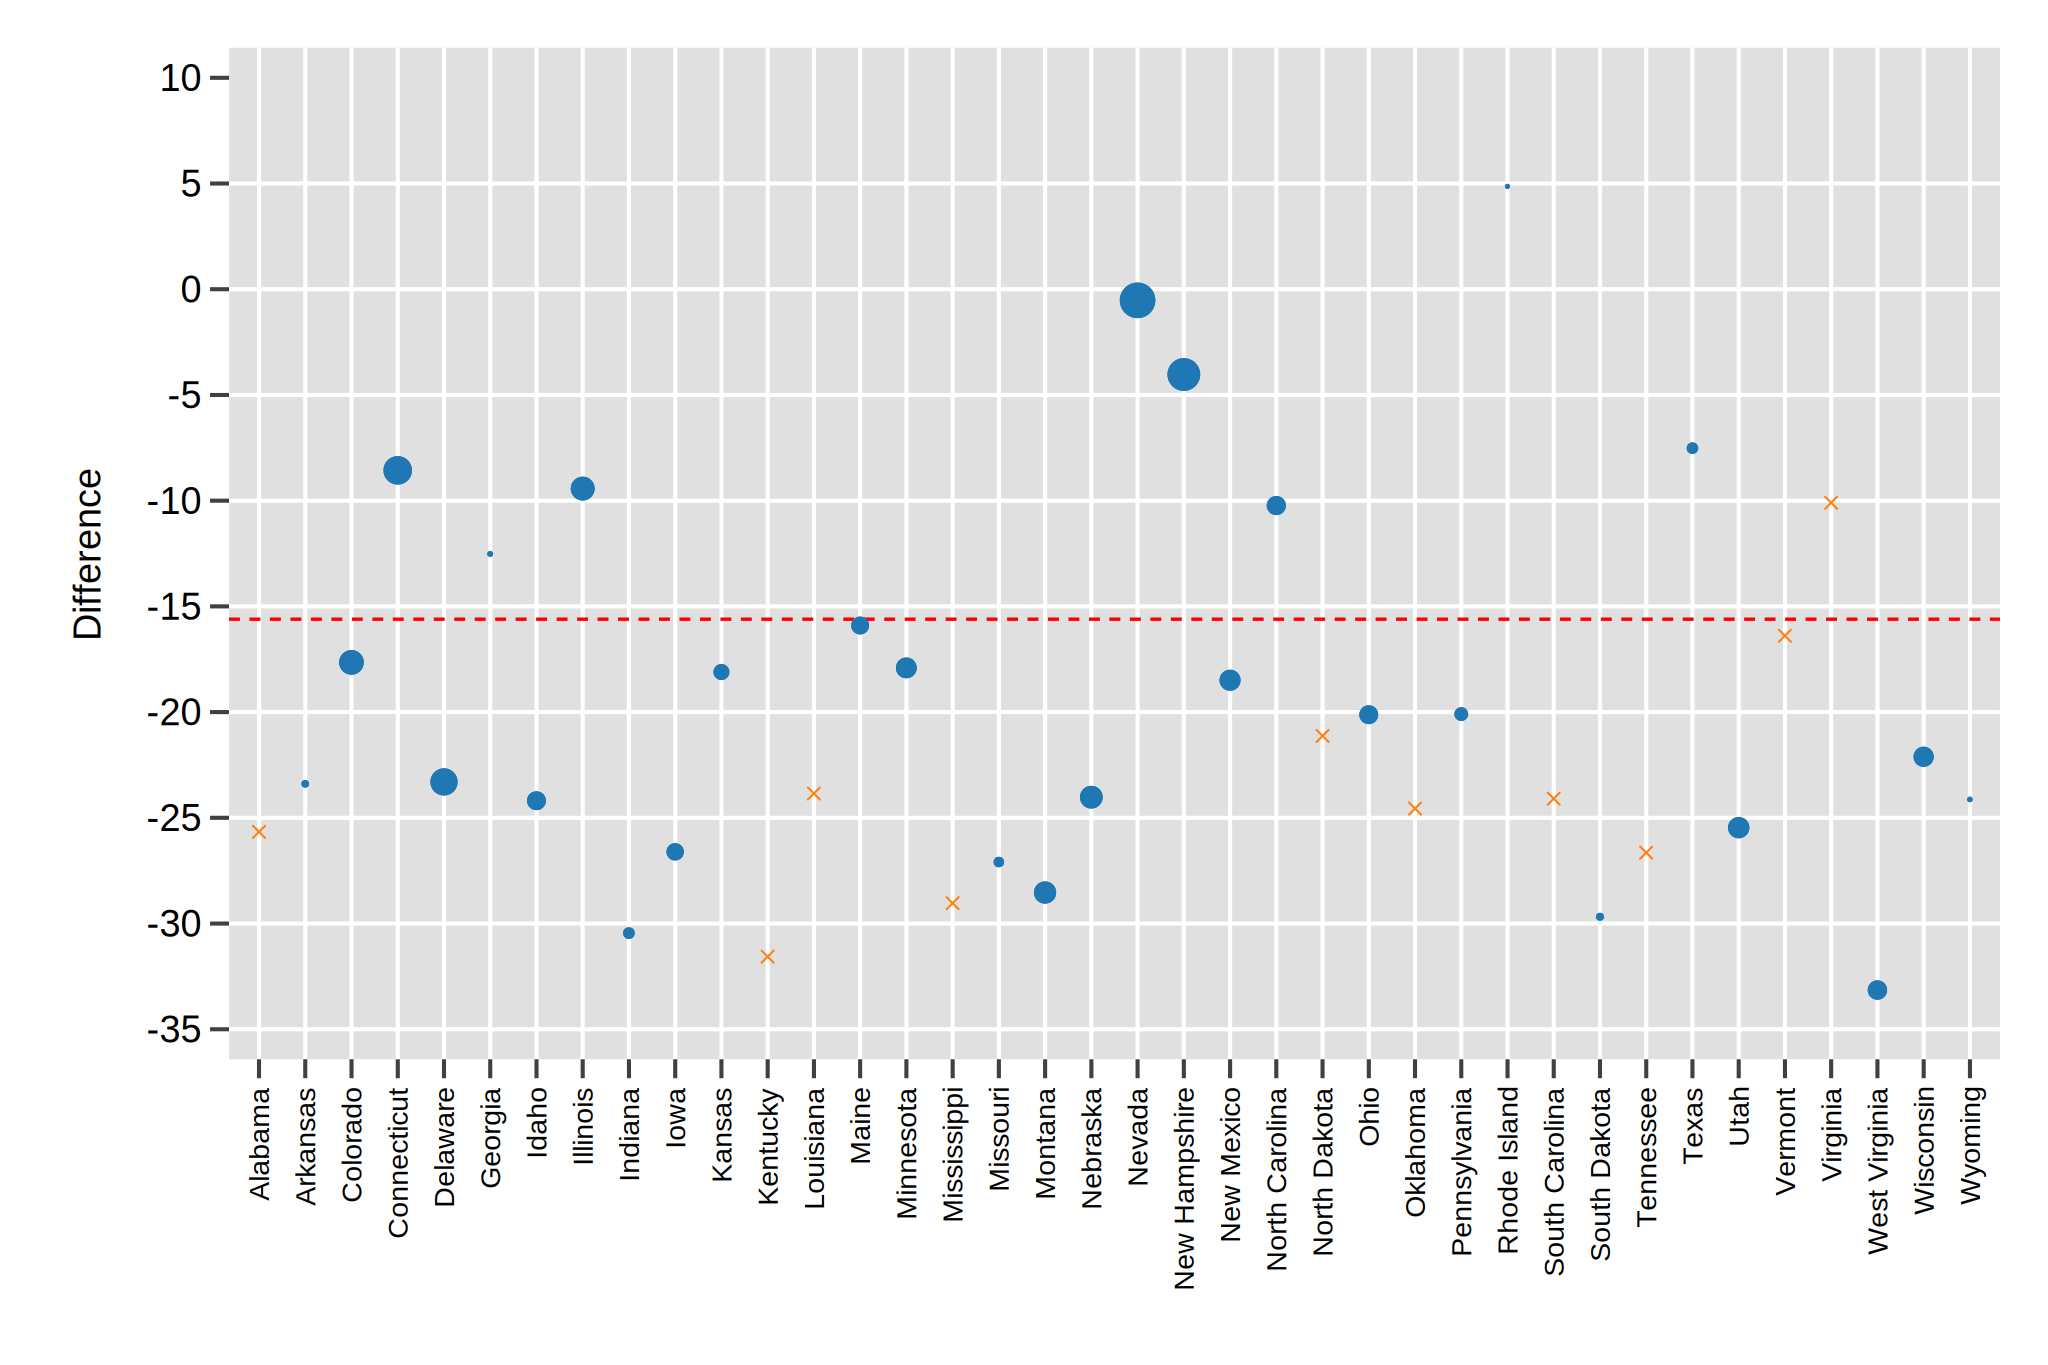

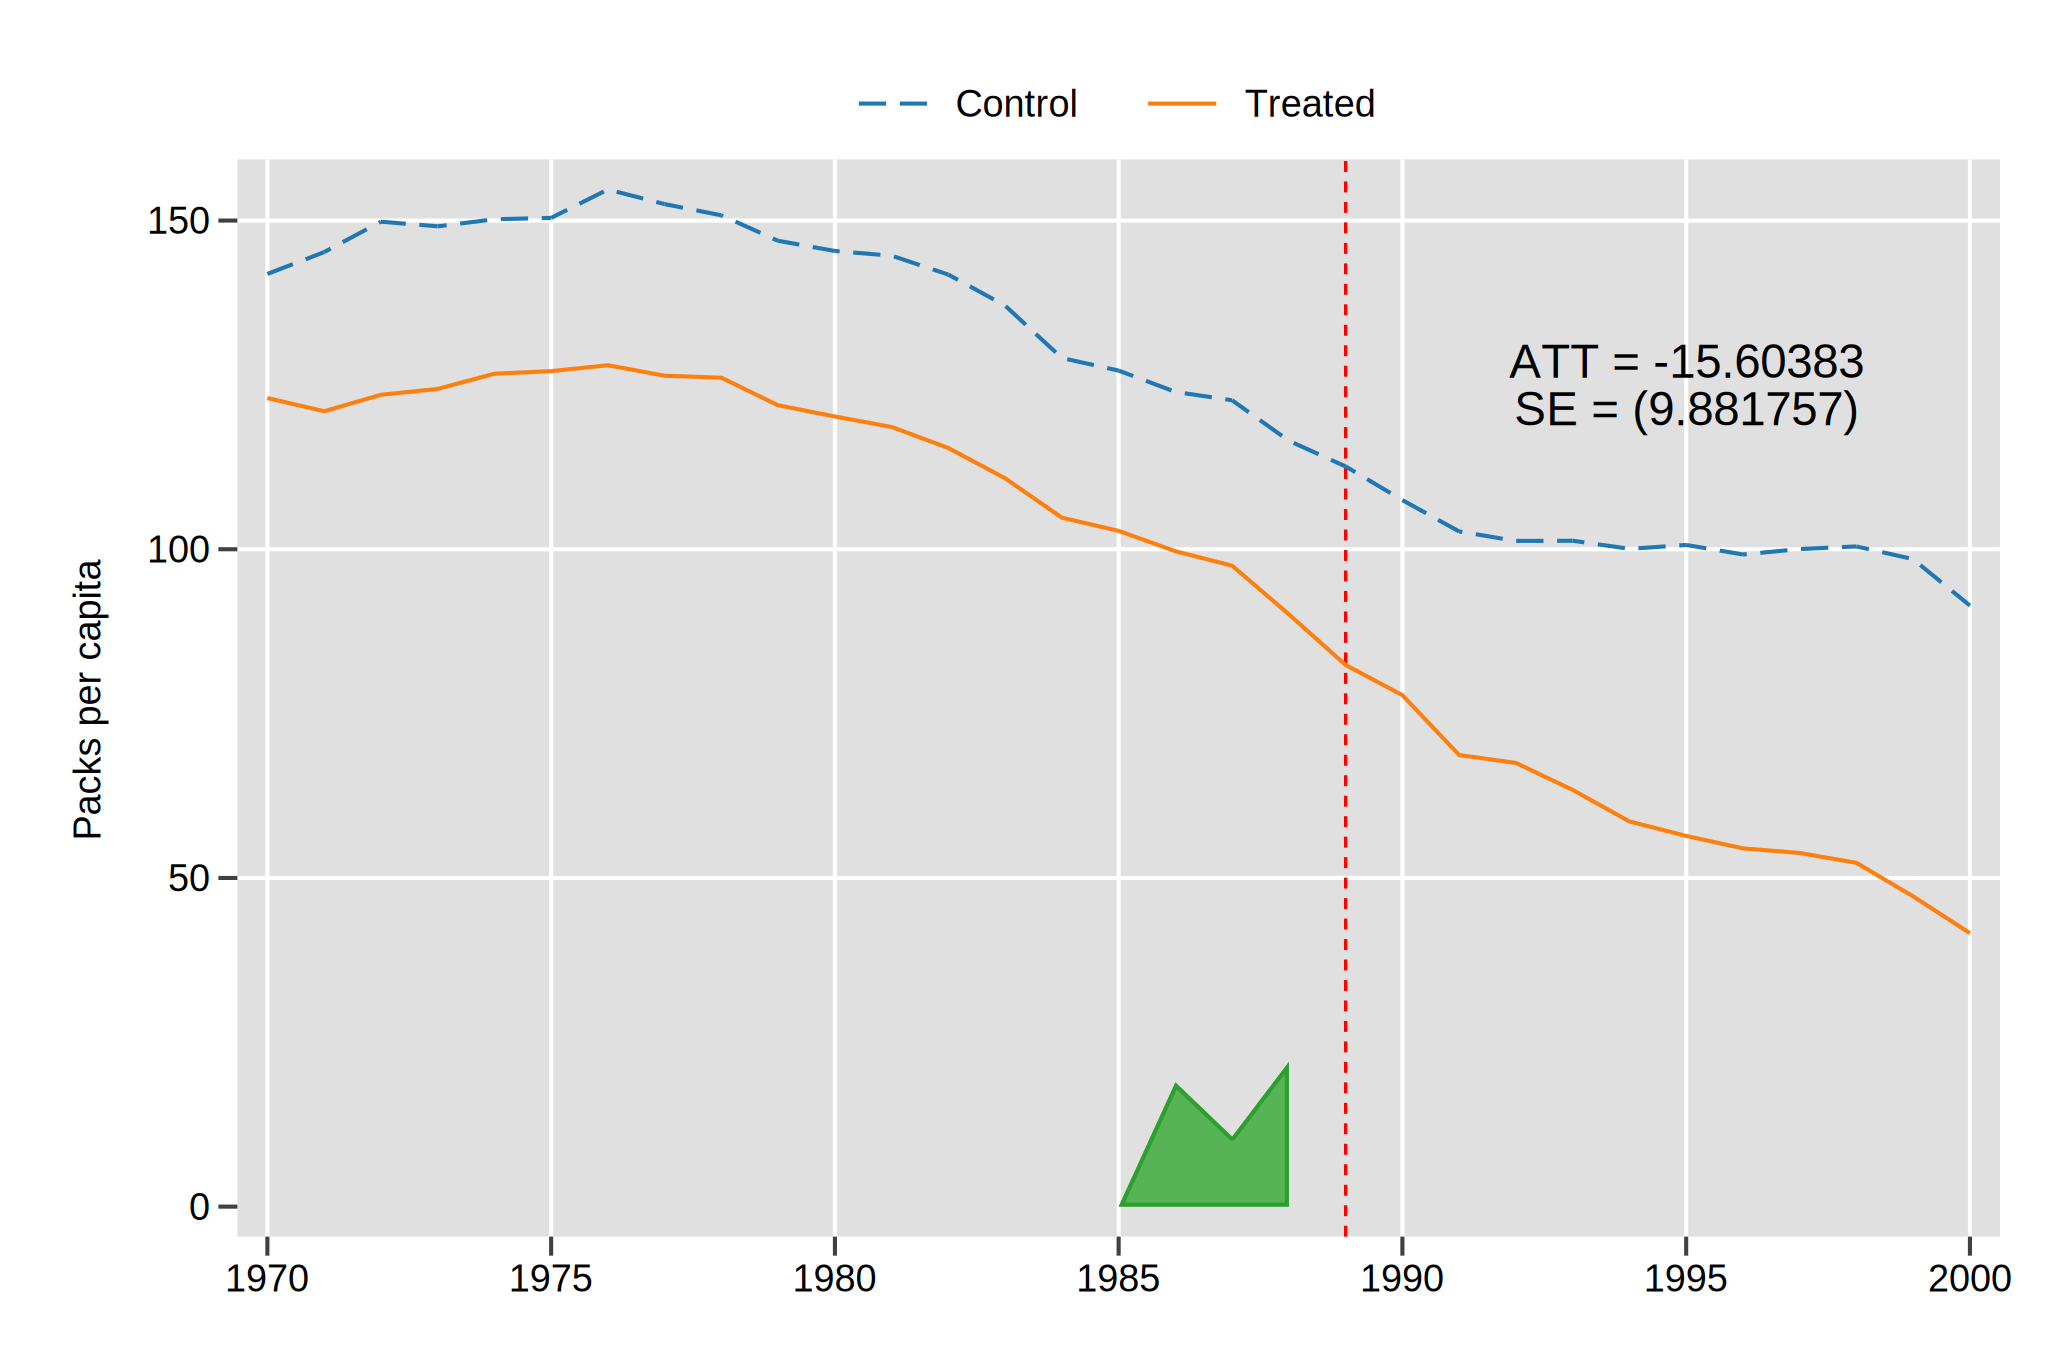

In [7]:
%%stata


#delimit ;

local scheme = "gg_tableau" ;

sdid packspercapita state year treated, vce(placebo) reps(100) seed($seed_num) g1on
     graph g1_opt(xtitle("") ylabel(-35(5)10) scheme(`scheme')) 
     g2_opt(ylabel(0(50)150) xlabel(1970(5)2000) ytitle("Packs per capita") 
            xtitle("") text(125 1995 "ATT = `e(ATT)'" " SE = (`e(se)')") scheme(`scheme'))
    graph_export(sdid_, .png);
#delimit cr

## Let's break down the command. 
• Again, #delimit; just changes the character that marks the end of a command

• Then sdid requires you to specify a y variable (here packspercapita) and then it requires a group variable, that distinguishes the units and a time variable to distinguish the periods. 

• Finally you need a treated variable that is equal to 1 for all periods in which the treated unit was treated, and 0 otherwise (always 0 for control units)

• vce allows you to specify how you want to calculate the standard erros. Placebo is the only method that does not require more than one treated unit per treated period, so we go with that

• Reps specifies how many times to run the procedure (for standard error estimation)

• seed sets the seed

• g1on turns "on" the option to output the plot with the weights assigned to each unit

• g1_opt and g2_opt allow you to personalize the plot

• graph_export specifies how you want the graph to be saved in your working directory. In this case it'll be saved as "sdid_trends1989 and sdid_weights1989" , where 1989 is the treatment year



. 
. 
. // We can also use this command to output a regular old synthetic control plo
> t
. 
. #delimit ;
delimiter now ;
. local scheme = "gg_tableau" ;

. sdid packspercapita state year treated, vce(placebo) reps(100) seed($seed_num
> ) method(sc) g1on
>      graph g1_opt(xtitle("") ylabel(-35(5)10) scheme(`scheme')) 
>      g2_opt(ylabel(0(50)150) xlabel(1970(5)2000) ytitle("Packs per capita") 
>             xtitle("") text(125 1995 "ATT = `e(ATT)'" " SE = (`e(se)')") sche
> me(`scheme'))
>     graph_export(sdid_, .png);
Placebo replications (100). This may take some time.
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5
..................................................     50
..................................................     100


Synthetic Control

-----------------------------------------------------------------------------
packsperca~a |     ATT     Std. Err.     t      P>|t|    [95% Conf. Interval]
-------------+---------------------------------------------------------

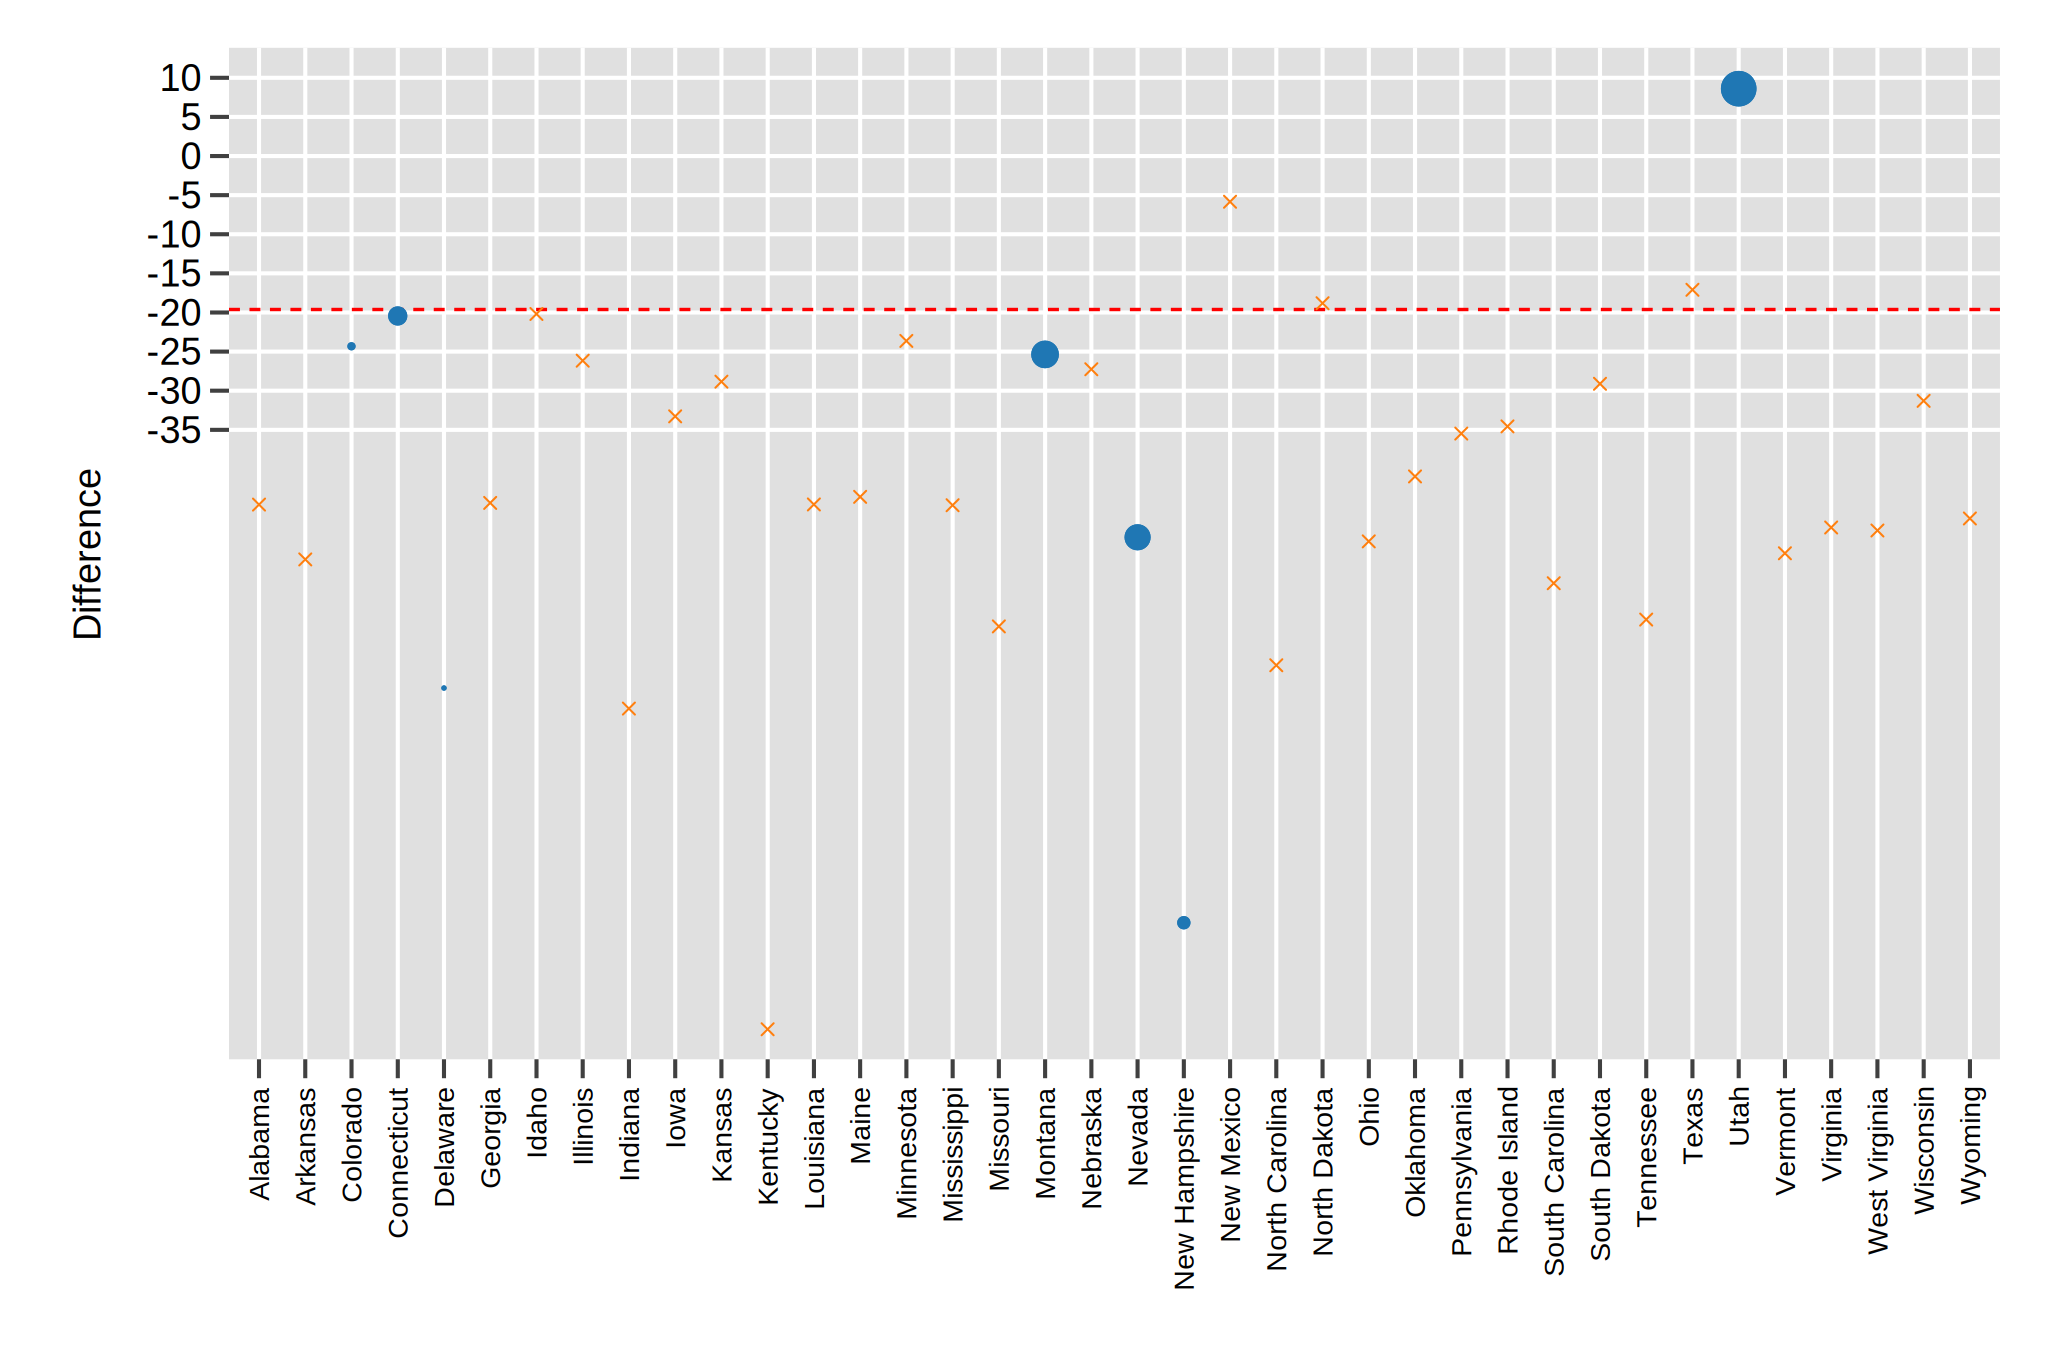

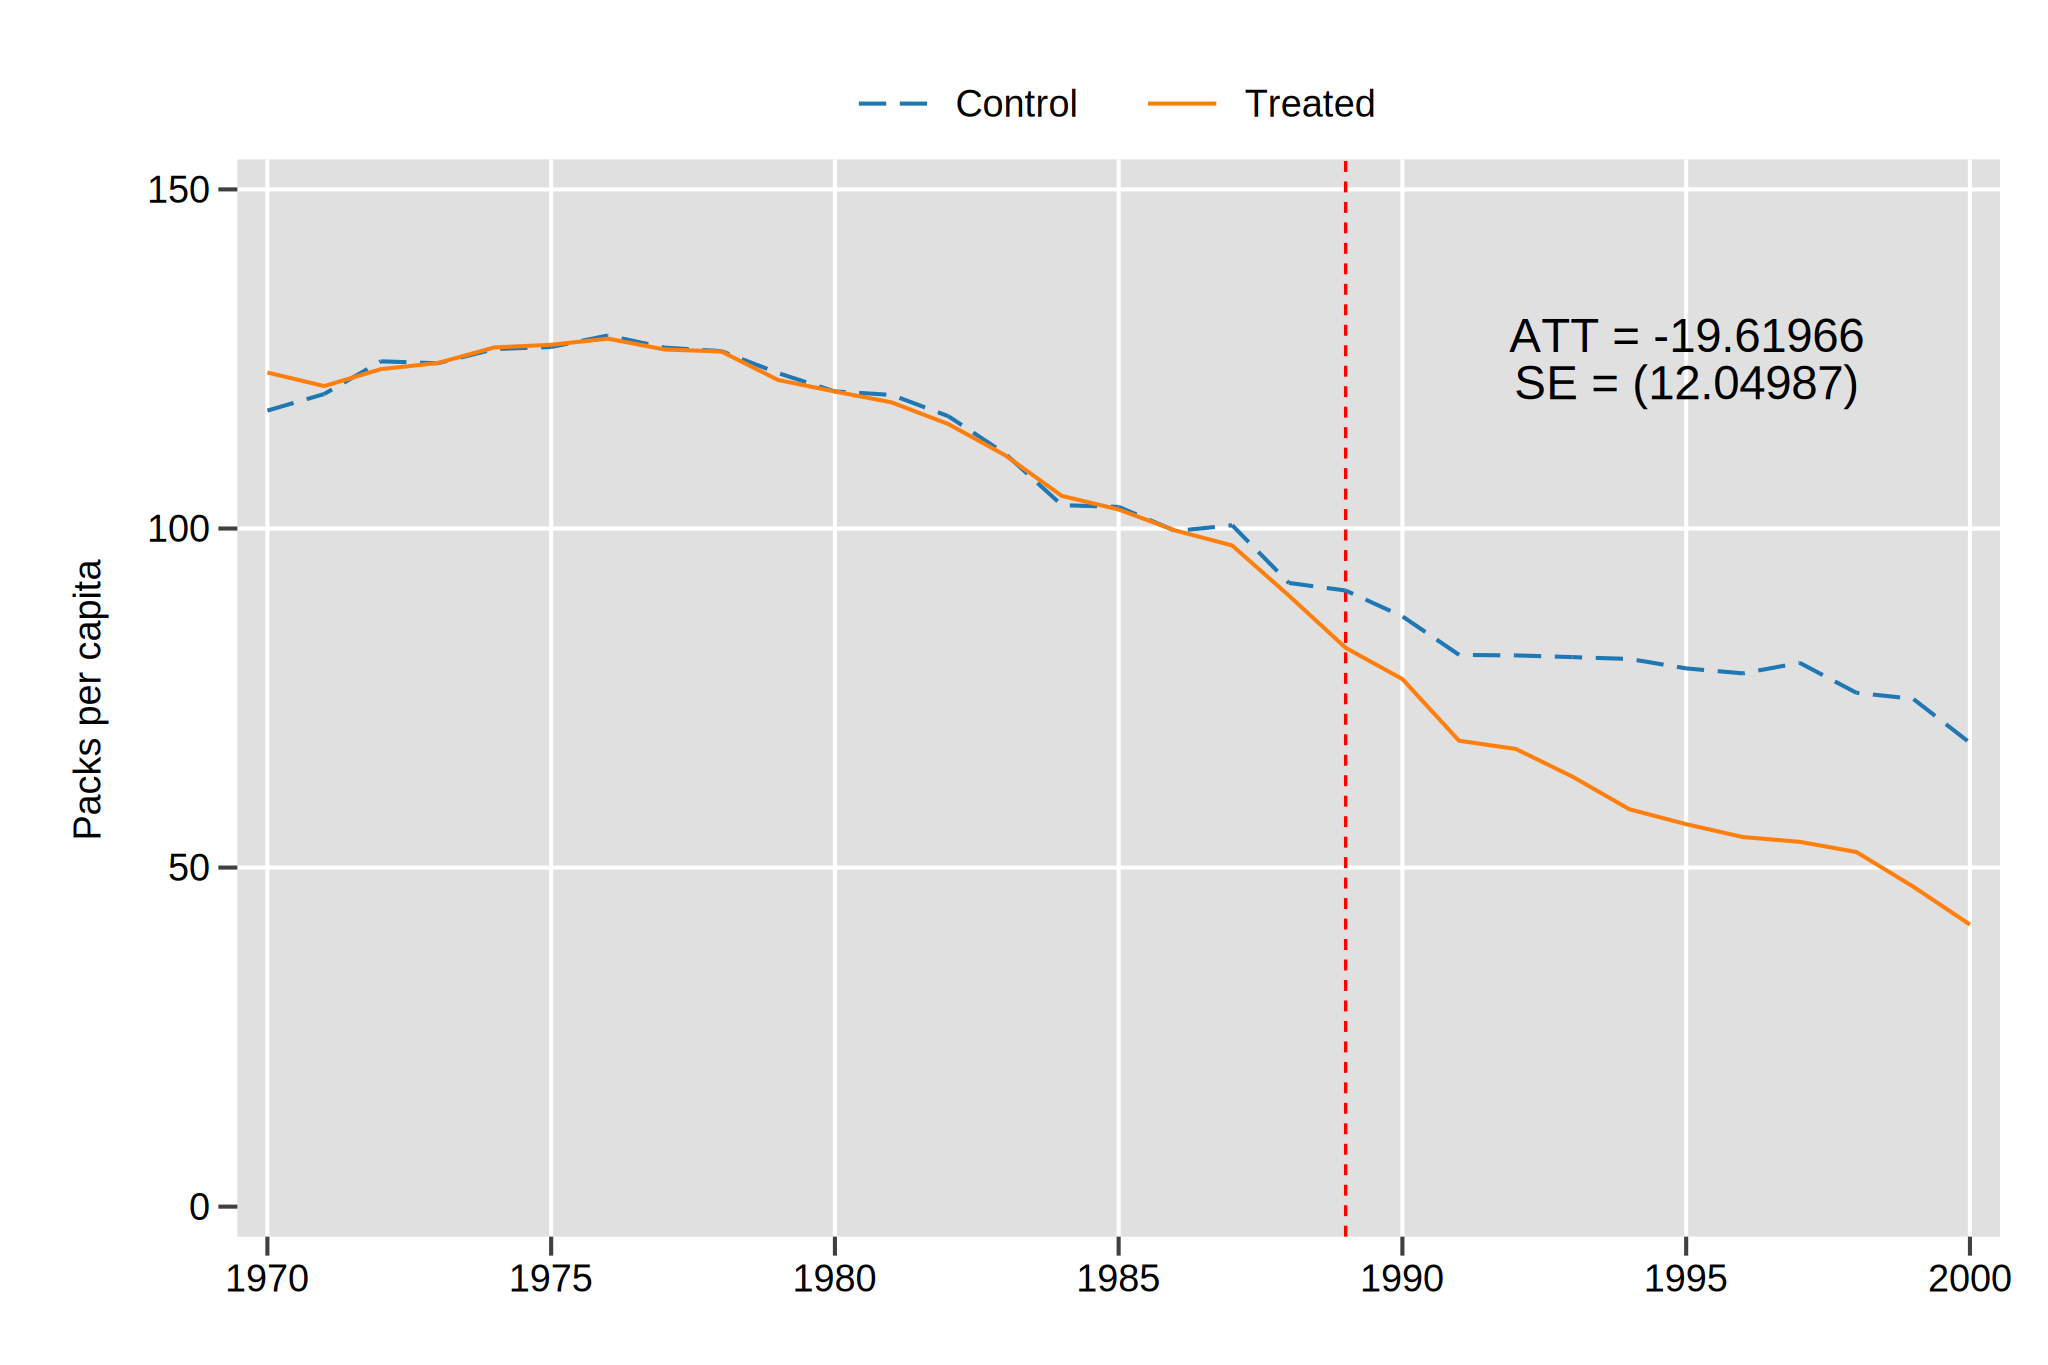

In [9]:
%%stata


// We can also use this command to output a regular old synthetic control plot

#delimit ;

local scheme = "gg_tableau" ;

sdid packspercapita state year treated, vce(placebo) reps(100) seed($seed_num) method(sc) g1on
     graph g1_opt(xtitle("") ylabel(-35(5)10) scheme(`scheme')) 
     g2_opt(ylabel(0(50)150) xlabel(1970(5)2000) ytitle("Packs per capita") 
            xtitle("") text(125 1995 "ATT = `e(ATT)'" " SE = (`e(se)')") scheme(`scheme'))
    graph_export(sdid_, .png);
#delimit cr
                                                                                
// Notice that the only difference is that we specified "method(sc)"                                                                                


. 
. // As well as a DiD
. #delimit ;
delimiter now ;
. local scheme = "gg_tableau" ;

. sdid packspercapita state year treated, vce(placebo) reps(100) seed($seed_num
> ) method(did) g1on
>      graph g1_opt(xtitle("") ylabel(-35(5)10) scheme(`scheme')) 
>      g2_opt(ylabel(0(50)150) xlabel(1970(5)2000) ytitle("Packs per capita") 
>             xtitle("") text(125 1995 "ATT = `e(ATT)'" " SE = (`e(se)')") sche
> me(`scheme'))
>     graph_export(sdid_, .png);
Placebo replications (100). This may take some time.
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5
..................................................     50
..................................................     100


Difference-in-Differences Estimator

-----------------------------------------------------------------------------
packsperca~a |     ATT     Std. Err.     t      P>|t|    [95% Conf. Interval]
-------------+---------------------------------------------------------------
     treated | -27.34911   18.67010    -1.

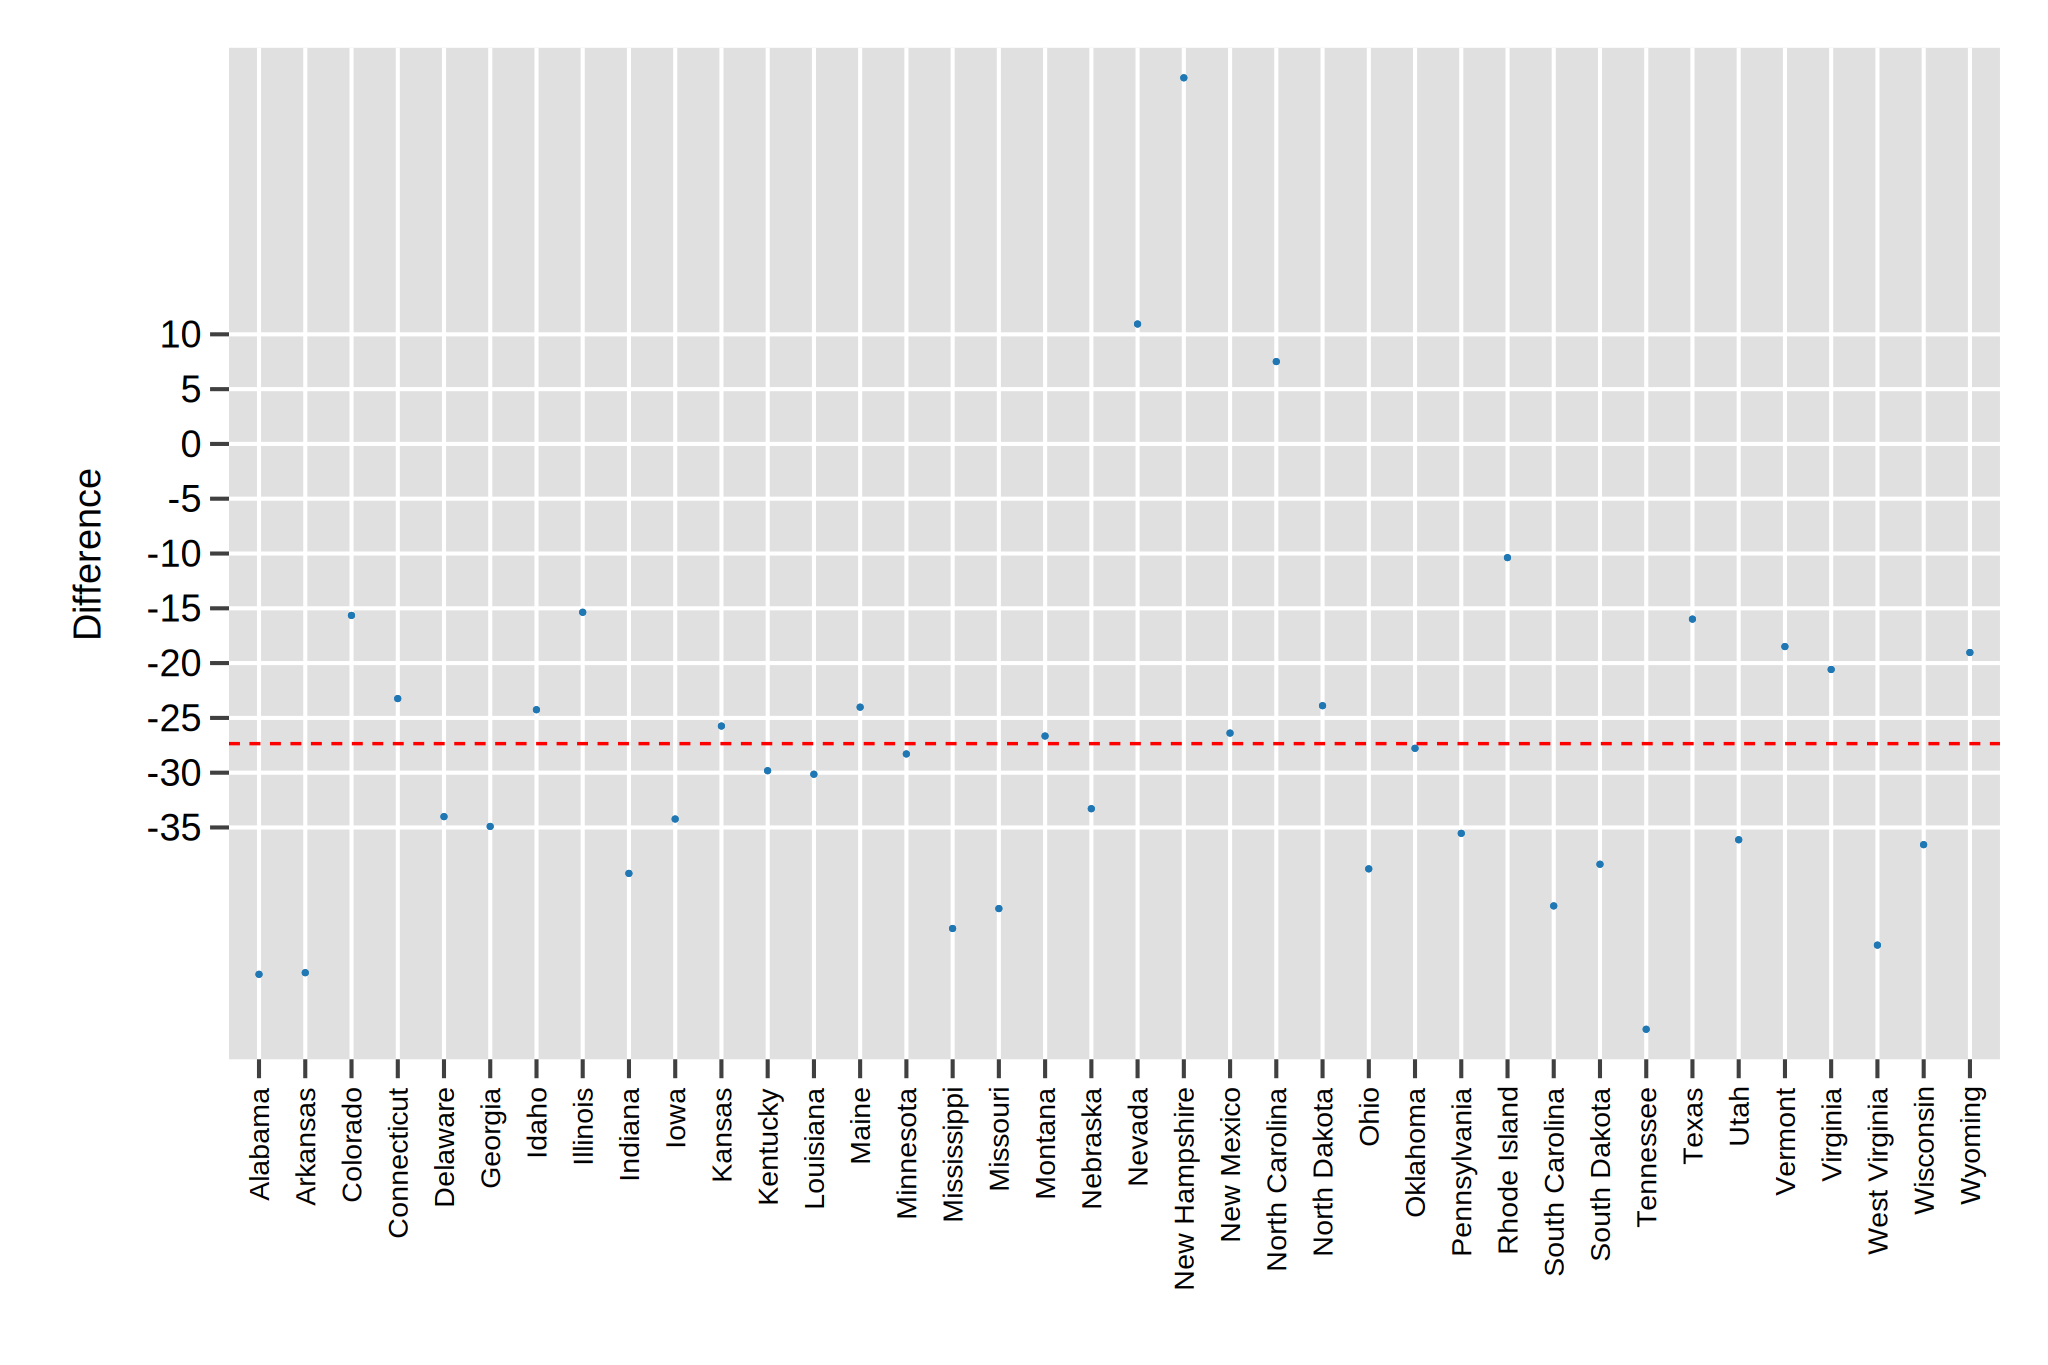

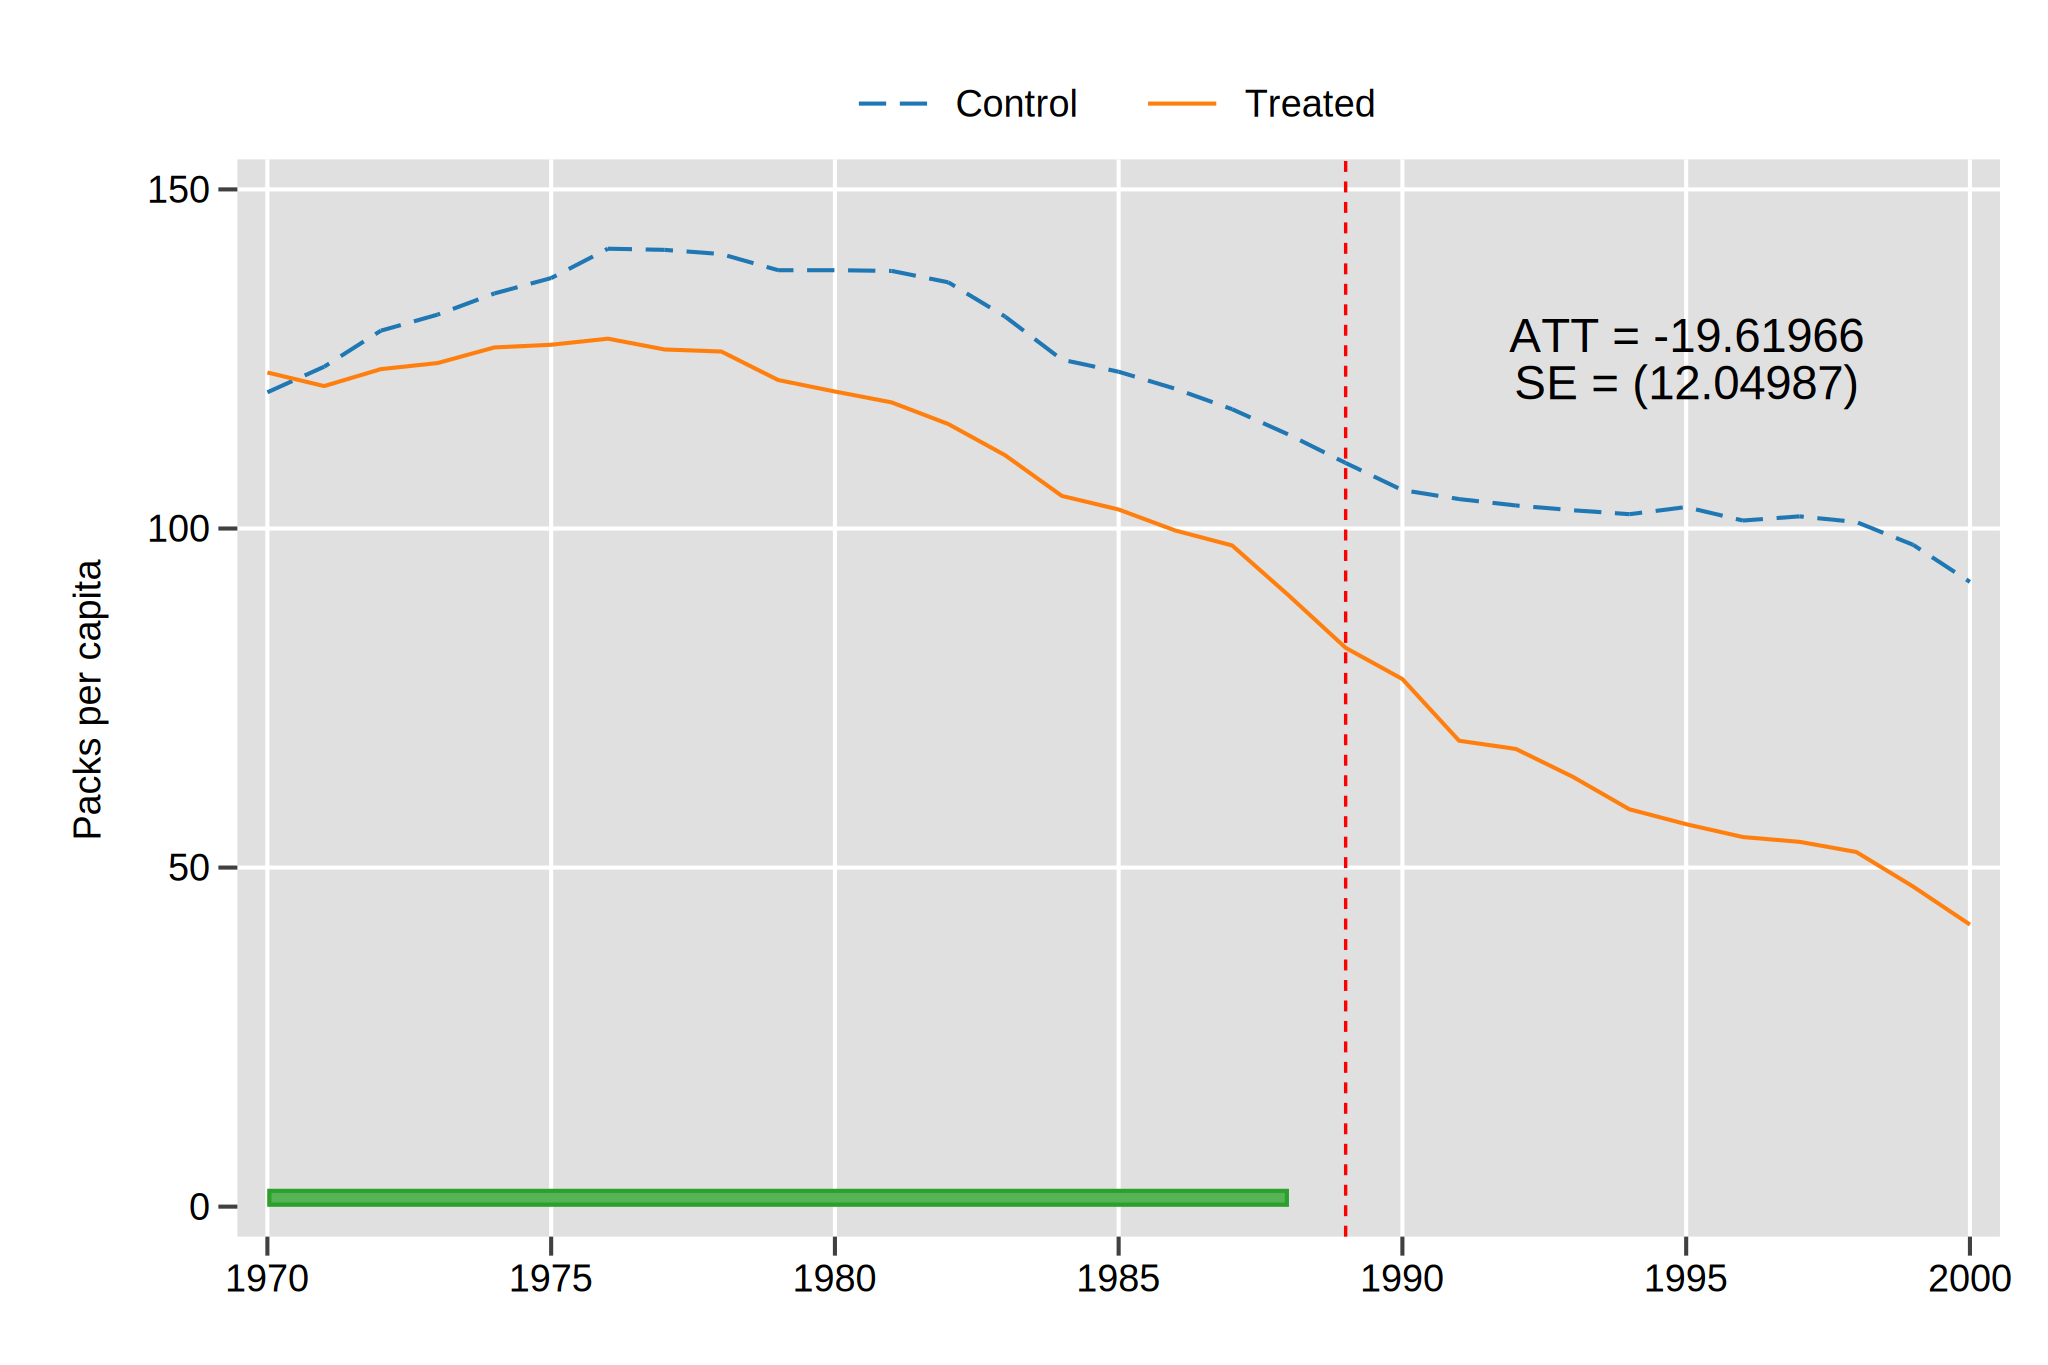

In [10]:
%%stata

// As well as a DiD
#delimit ;

local scheme = "gg_tableau" ;

sdid packspercapita state year treated, vce(placebo) reps(100) seed($seed_num) method(did) g1on
     graph g1_opt(xtitle("") ylabel(-35(5)10) scheme(`scheme')) 
     g2_opt(ylabel(0(50)150) xlabel(1970(5)2000) ytitle("Packs per capita") 
            xtitle("") text(125 1995 "ATT = `e(ATT)'" " SE = (`e(se)')") scheme(`scheme'))
    graph_export(sdid_, .png);
#delimit cr
// Notice that the only difference is that we specified "method(did)"

In [11]:
%%stata


// Just to show how to add covariates to the specification
*create a uniform variable to use as a control
gen r=runiform()

*run sdid
eststo sdid_1: sdid packspercapita state year treated, vce(placebo) seed($seed_num)
eststo sdid_2: sdid packspercapita state year treated, vce(placebo) seed($seed_num) covariates(r, projected)

// for details on the "projected", let's check the helpfile

*create a table
esttab sdid_1 sdid_2, starlevel ("*" 0.10 "**" 0.05 "***" 0.01) b(%-9.3f) se(%-9.3f)




. 
. 
. // Just to show how to add covariates to the specification
. *create a uniform variable to use as a control
. gen r=runiform()

. 
. *run sdid
. eststo sdid_1: sdid packspercapita state year treated, vce(placebo) seed($see
> d_num)
Placebo replications (50). This may take some time.
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5
..................................................     50


Synthetic Difference-in-Differences Estimator

-----------------------------------------------------------------------------
packsperca~a |     ATT     Std. Err.     t      P>|t|    [95% Conf. Interval]
-------------+---------------------------------------------------------------
     treated | -15.60383    9.54012    -1.64    0.102   -34.30211     3.09445
-----------------------------------------------------------------------------
95% CIs and p-values are based on Large-Sample approximations.
Refer to Arkhangelsky et al., (2020) for theoretical derivations.

. eststo sdid_2: sdid packspe

In [12]:
%%stata

help sdid


. 
. help sdid


Title
-----

    sdid -- Synthetic difference-in-differences estimation, inference, and
    visualization

Syntax
------

    sdid depvar groupvar timevar treatment [if] [in], vce(vcetype) [options]

    options                        Description
    -------------------------------------------------------------------------
      vce(vcetype)                  vcetype may be bootstrap, jackknife, or
                                     placebo.
      covariates(varlist, [type])   Allows for the inclusion of covariates in
                                     the calculation of the synthetic
                                     counterfactual.  Optional type can be
                                     specified, as either "optimized" (the
                                     default) or "projected", which is
                                     preferable in certain circumstances.
      seed(#)                       set random-number seed to #.
      reps(#)              

In [13]:
%%stata


**********************************
*                                *
*                                *
*            Example 2           *
*                                *
*                                *
**********************************


// Example from help file

webuse set damianclarke.net/stata/

webuse quota_example.dta, clear
// we can look at this other example where we have women in parliament as the outcome variable 
// and quota as the treatment variable. So quota is 1 in country-years when the observation had a quota for women in parliament



. 
. 
. **********************************
. *                                *
. *                                *
. *            Example 2           *
. *                                *
. *                                *
. **********************************
. 
. 
. // Example from help file
. 
. webuse set damianclarke.net/stata/
(prefix now "http://damianclarke.net/stata")

. 
. webuse quota_example.dta, clear

. // we can look at this other example where we have women in parliament as the
>  outcome variable 
. // and quota as the treatment variable. So quota is 1 in country-years when t
> he observation had a quota for women in parliament
. 


In [14]:
%%stata -doutd df2

webuse quota_example.dta, clear


. 
. webuse quota_example.dta, clear

. 


In [15]:
display(df2)

,womparl,lnmmrt,country,year,quota,lngdp
0,28.799999,4.262680,Albania,1990,0.0,8.460165
1,3.600000,4.234107,Albania,1991,0.0,8.115373
2,5.700000,4.174387,Albania,1992,0.0,8.046714
3,5.700000,4.143135,Albania,1993,0.0,8.144483
4,5.700000,3.891820,Albania,1994,0.0,8.230356
...,...,...,...,...,...,...
3089,15.000000,6.013715,Zimbabwe,2011,0.0,7.418864
3090,15.000000,5.937536,Zimbabwe,2012,0.0,7.534424
3091,31.500000,5.910797,Zimbabwe,2013,0.0,7.565154
3092,31.500000,5.993961,Zimbabwe,2014,0.0,7.562753


In [16]:
%%stata


sdid womparl country year quota, vce(bootstrap) seed($seed_num)

sdid womparl country year quota, vce(bootstrap) seed($seed_num) covariates(lngdp, projected)



. 
. 
. sdid womparl country year quota, vce(bootstrap) seed($seed_num)
Bootstrap replications (50). This may take some time.
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5
..................................................     50


Synthetic Difference-in-Differences Estimator

-----------------------------------------------------------------------------
     womparl |     ATT     Std. Err.     t      P>|t|    [95% Conf. Interval]
-------------+---------------------------------------------------------------
       quota |   8.03410    3.38612     2.37    0.018     1.39742    14.67078
-----------------------------------------------------------------------------
95% CIs and p-values are based on Large-Sample approximations.
Refer to Arkhangelsky et al., (2020) for theoretical derivations.

. 
. sdid womparl country year quota, vce(bootstrap) seed($seed_num) covariates(ln
> gdp, projected)


SystemError: Missing values found in covariates.
A balanced panel without missing observations is required.
r(416);
r(416);


In [17]:
%%stata 

drop if lngdp == .

sdid womparl country year quota, vce(bootstrap) seed($seed_num) covariates(lngdp, projected)


. 
. drop if lngdp == .
(104 observations deleted)

. 
. sdid womparl country year quota, vce(bootstrap) seed($seed_num) covariates(ln
> gdp, projected)
Bootstrap replications (50). This may take some time.
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5
..................................................     50


Synthetic Difference-in-Differences Estimator

-----------------------------------------------------------------------------
     womparl |     ATT     Std. Err.     t      P>|t|    [95% Conf. Interval]
-------------+---------------------------------------------------------------
       quota |   8.05927    3.60787     2.23    0.025     0.98796    15.13057
-----------------------------------------------------------------------------
95% CIs and p-values are based on Large-Sample approximations.
Refer to Arkhangelsky et al., (2020) for theoretical derivations.

. 


In [ ]:
%%stata 

// don't actually run this.

sdid womparl country year quota, vce(bootstrap) seed($seed_num) covariates(lngdp) // this might take forever

// This is because the "projected" is faster than the "optimized"


. 
. // don't actually run this.
. 
. sdid womparl country year quota, vce(bootstrap) seed($seed_num) covariates(ln
> gdp) // this might take forever
Bootstrap replications (50). This may take some time.
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5
....

In [8]:
%%stata


**********************************
*                                *
*                                *
*            Example 3           *
*                                *
*                                *
**********************************


///Another example - Just to show that the period weights may be different, depending on the data
// First, let's just generate some data

clear

local units = 30
local start = 1
local end 	= 60

local time = `end' - `start' + 1
local obsv = `units' * `time'
set obs `obsv'

egen id	   = seq(), b(`time')  
egen t 	   = seq(), f(`start') t(`end') 	

sort  id t
xtset id t



. 
. 
. **********************************
. *                                *
. *                                *
. *            Example 3           *
. *                                *
. *                                *
. **********************************
. 
. 
. ///Another example - Just to show that the period weights may be different, d
> epending on the data
> // First, let's just generate some data
. 
. clear

. 
. local units = 30

. local start = 1

. local end       = 60

. 
. local time = `end' - `start' + 1

. local obsv = `units' * `time'

. set obs `obsv'
Number of observations (_N) was 0, now 1,800.

. 
. egen id    = seq(), b(`time')  

. egen t     = seq(), f(`start') t(`end')         

. 
. sort  id t

. xtset id t

Panel variable: id (strongly balanced)
 Time variable: t, 1 to 60
         Delta: 1 unit

. 


In [9]:
%%stata


set seed $seed_num

gen Y 	   		= 0		// outcome variable	
gen D 	   		= 0		// intervention variable
gen cohort      = .  	// treatment cohort
gen effect      = .		// treatment effect size
gen first_treat = .		// when the treatment happens for each cohort
gen rel_time	= .     // time - first_treat

levelsof id, local(lvls)
foreach x of local lvls {
	local chrt = runiformint(0,5)	
	replace cohort = `chrt' if id==`x'
}




. 
. 
. set seed $seed_num

. 
. gen Y                   = 0             // outcome variable     

. gen D                   = 0             // intervention variable

. gen cohort      = .     // treatment cohort
(1,800 missing values generated)

. gen effect      = .             // treatment effect size
(1,800 missing values generated)

. gen first_treat = .             // when the treatment happens for each cohort
(1,800 missing values generated)

. gen rel_time    = .     // time - first_treat
(1,800 missing values generated)

. 
. levelsof id, local(lvls)
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 3
> 0

. foreach x of local lvls {
  2.         local chrt = runiformint(0,5)   
  3.         replace cohort = `chrt' if id==`x'
  4. }
(60 real changes made)
(60 real changes made)
(60 real changes made)
(60 real changes made)
(60 real changes made)
(60 real changes made)
(60 real changes made)
(60 real changes made)
(60 real changes made)
(60 real cha

In [10]:
%%stata


levelsof cohort , local(lvls)  

foreach x of local lvls {
	
	local eff = runiformint(2,10)
		replace effect = `eff' if cohort==`x'
			
	local timing = runiformint(`start',`end' + 20)	// 
	replace first_treat = `timing' if cohort==`x'
	replace first_treat = . if first_treat > `end'
		replace D = 1 if cohort==`x' & t>= `timing' 
}

replace rel_time = t - first_treat
replace Y = id + t + cond(D==1, effect * rel_time, 0) + rnormal()



. 
. 
. levelsof cohort , local(lvls)  
0 1 2 3 4 5

. 
. foreach x of local lvls {
  2.         
.         local eff = runiformint(2,10)
  3.                 replace effect = `eff' if cohort==`x'
  4.                         
.         local timing = runiformint(`start',`end' + 20)  // 
  5.         replace first_treat = `timing' if cohort==`x'
  6.         replace first_treat = . if first_treat > `end'
  7.                 replace D = 1 if cohort==`x' & t>= `timing' 
  8. }
(240 real changes made)
(240 real changes made)
(0 real changes made)
(220 real changes made)
(420 real changes made)
(420 real changes made)
(0 real changes made)
(140 real changes made)
(360 real changes made)
(360 real changes made)
(0 real changes made)
(108 real changes made)
(480 real changes made)
(480 real changes made)
(480 real changes made, 480 to missing)
(0 real changes made)
(60 real changes made)
(60 real changes made)
(0 real changes made)
(18 real changes made)
(240 real changes made)
(240 real c


. 
. 
. // Here cond(s,a,b,[,c]) executes a if x is true and nonmissing, b if x is fa
> lse, and c if x is missing; a if c is not specified and x evaluates to missin
> g
. 
. 
. rename t year

. 
. xtline Y, overlay legend(off)

. 
. sdid Y id year D, vce(bootstrap) seed($seed_num) 
Bootstrap replications (50). This may take some time.
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5
..................................................     50


Synthetic Difference-in-Differences Estimator

-----------------------------------------------------------------------------
           Y |     ATT     Std. Err.     t      P>|t|    [95% Conf. Interval]
-------------+---------------------------------------------------------------
           D | 103.41300   19.49003     5.31    0.000    65.21324   141.61276
-----------------------------------------------------------------------------
95% CIs and p-values are based on Large-Sample approximations.
Refer to Arkhangelsky et al., (2020) for theoretic

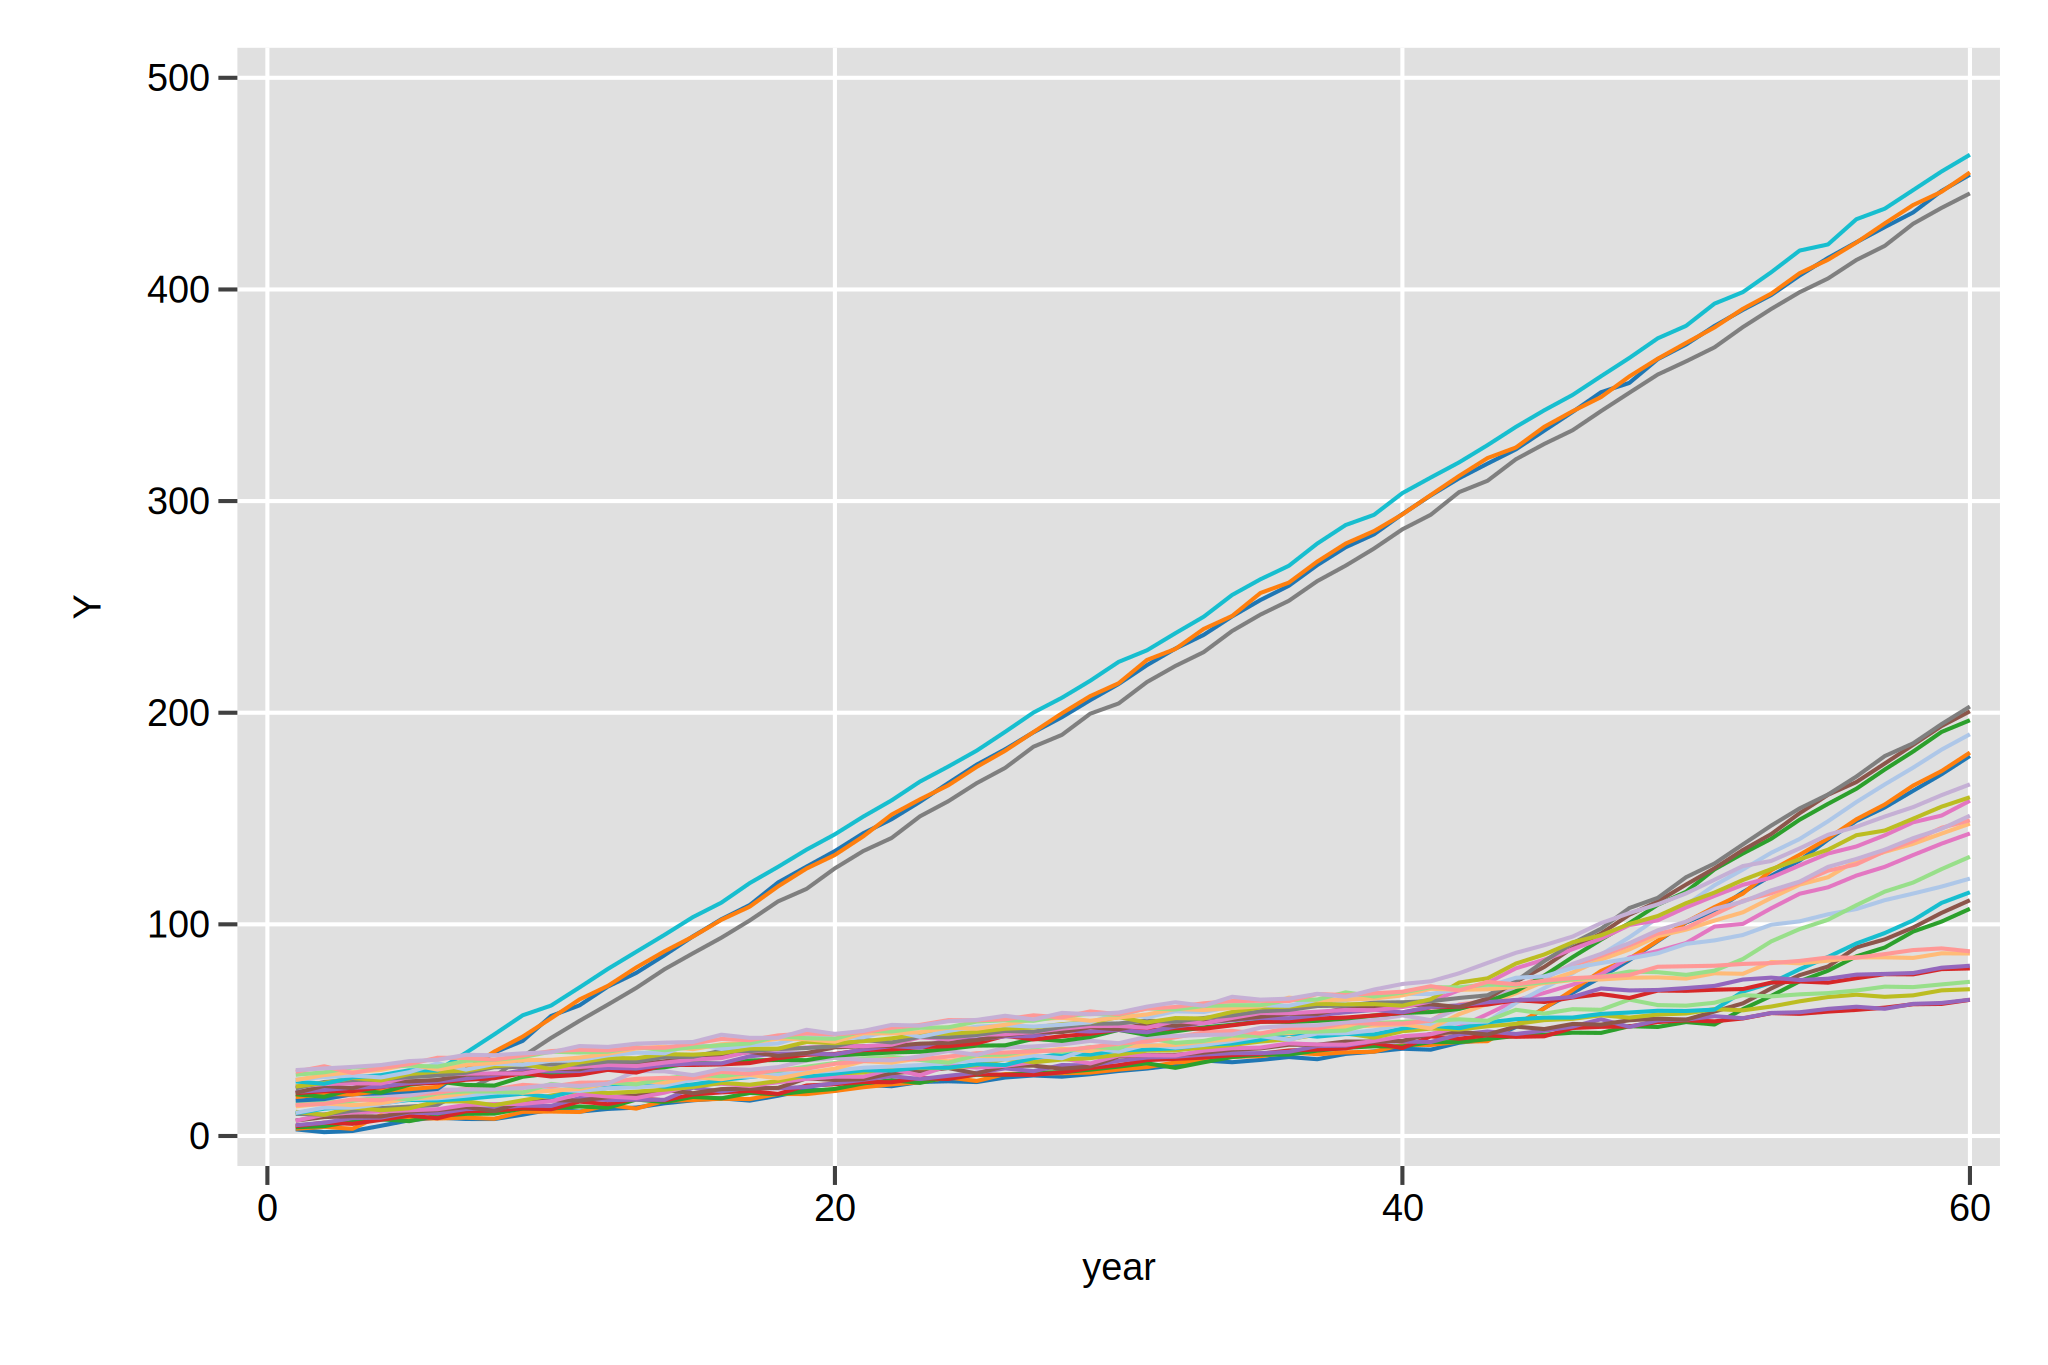

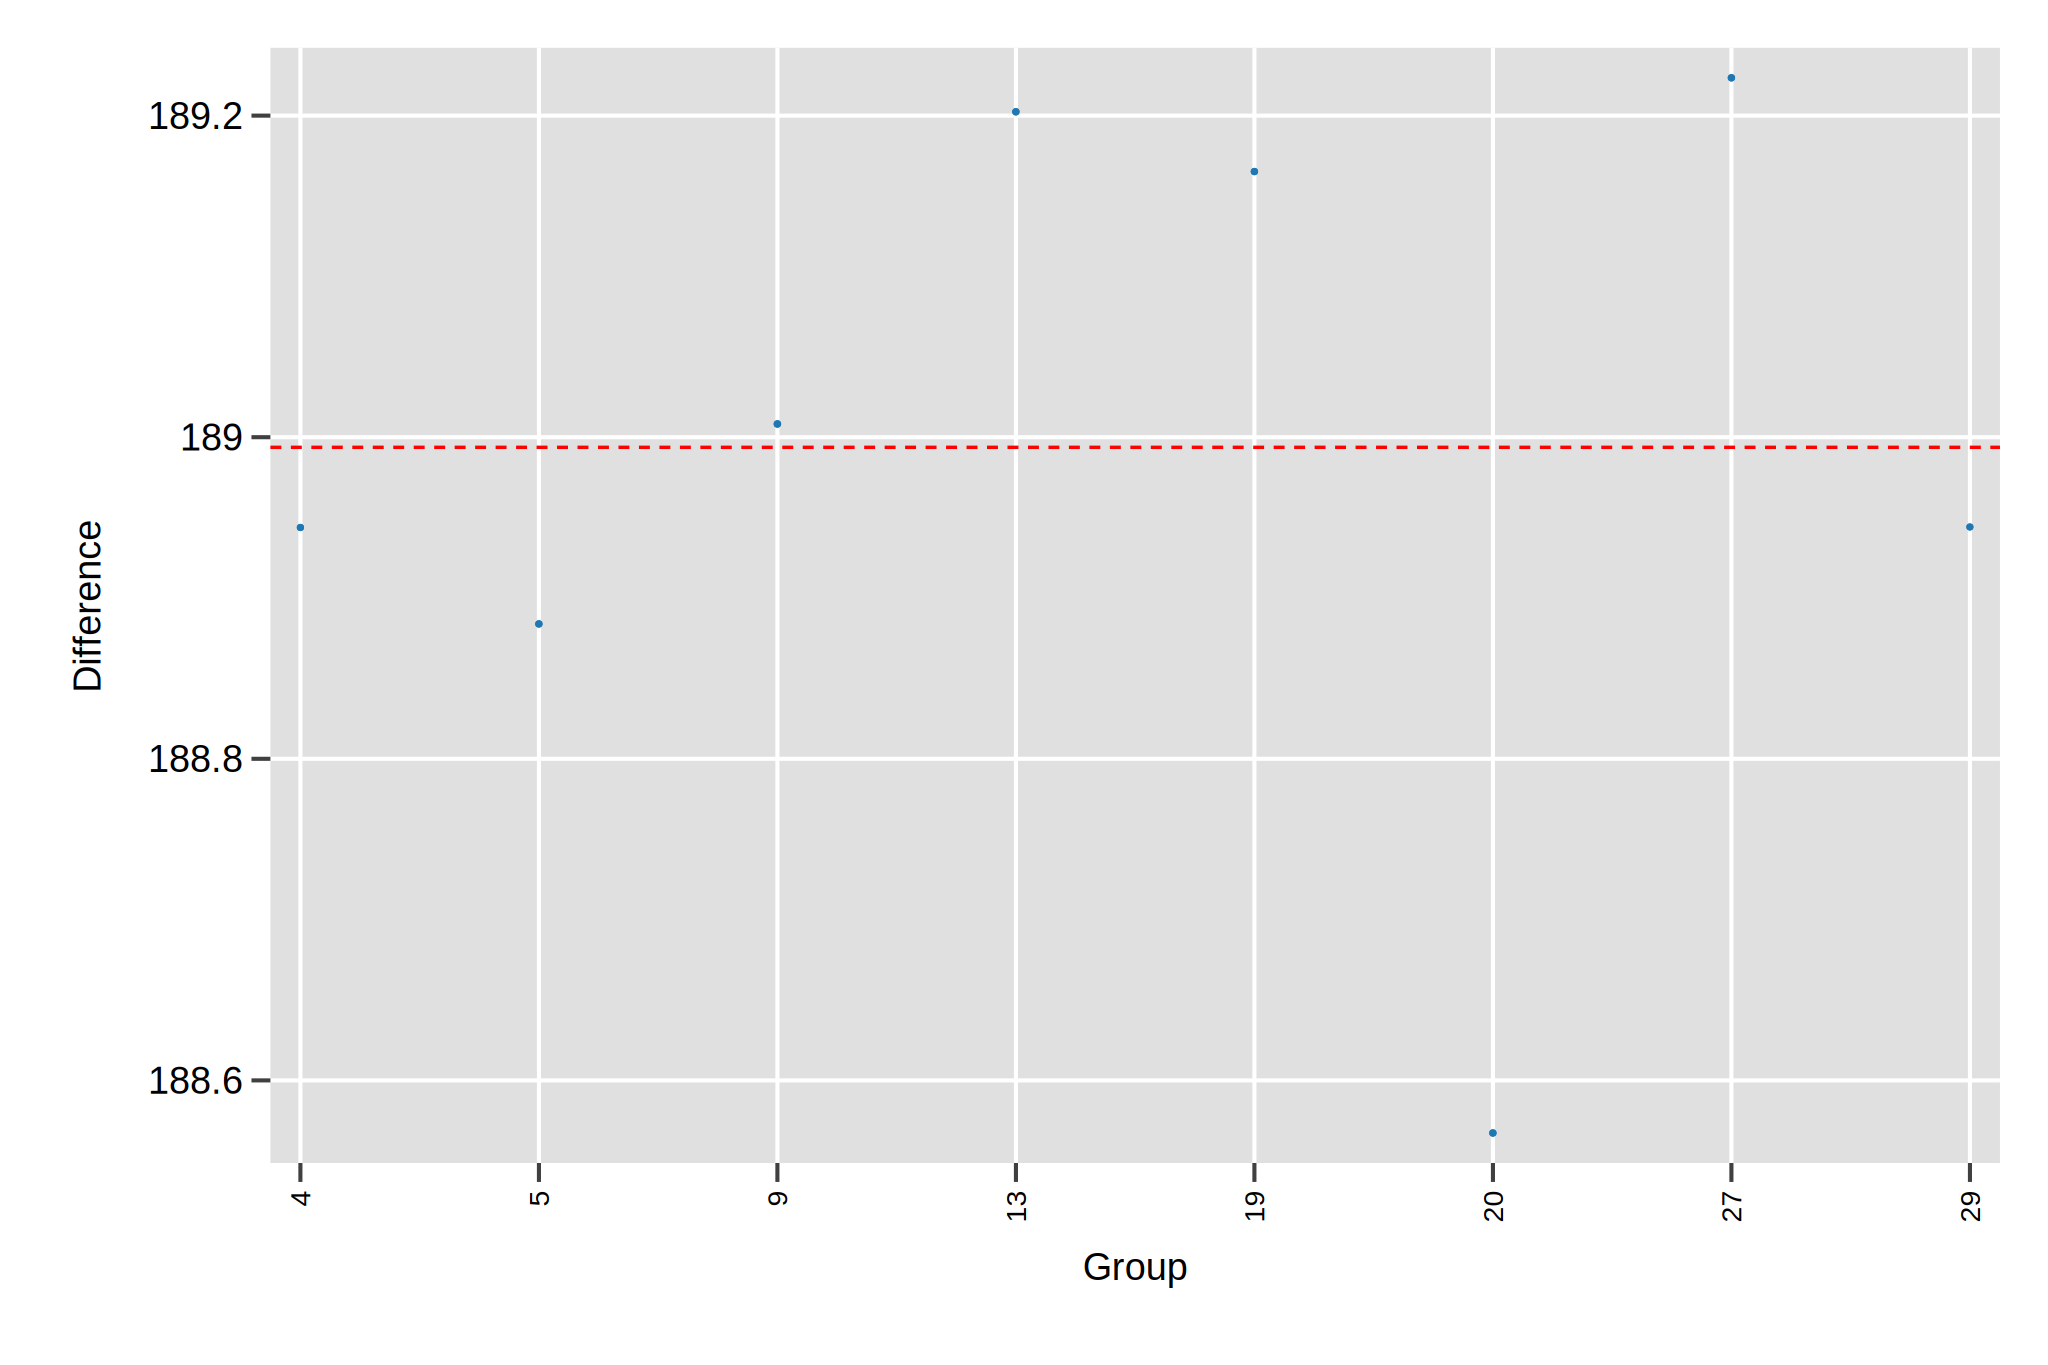

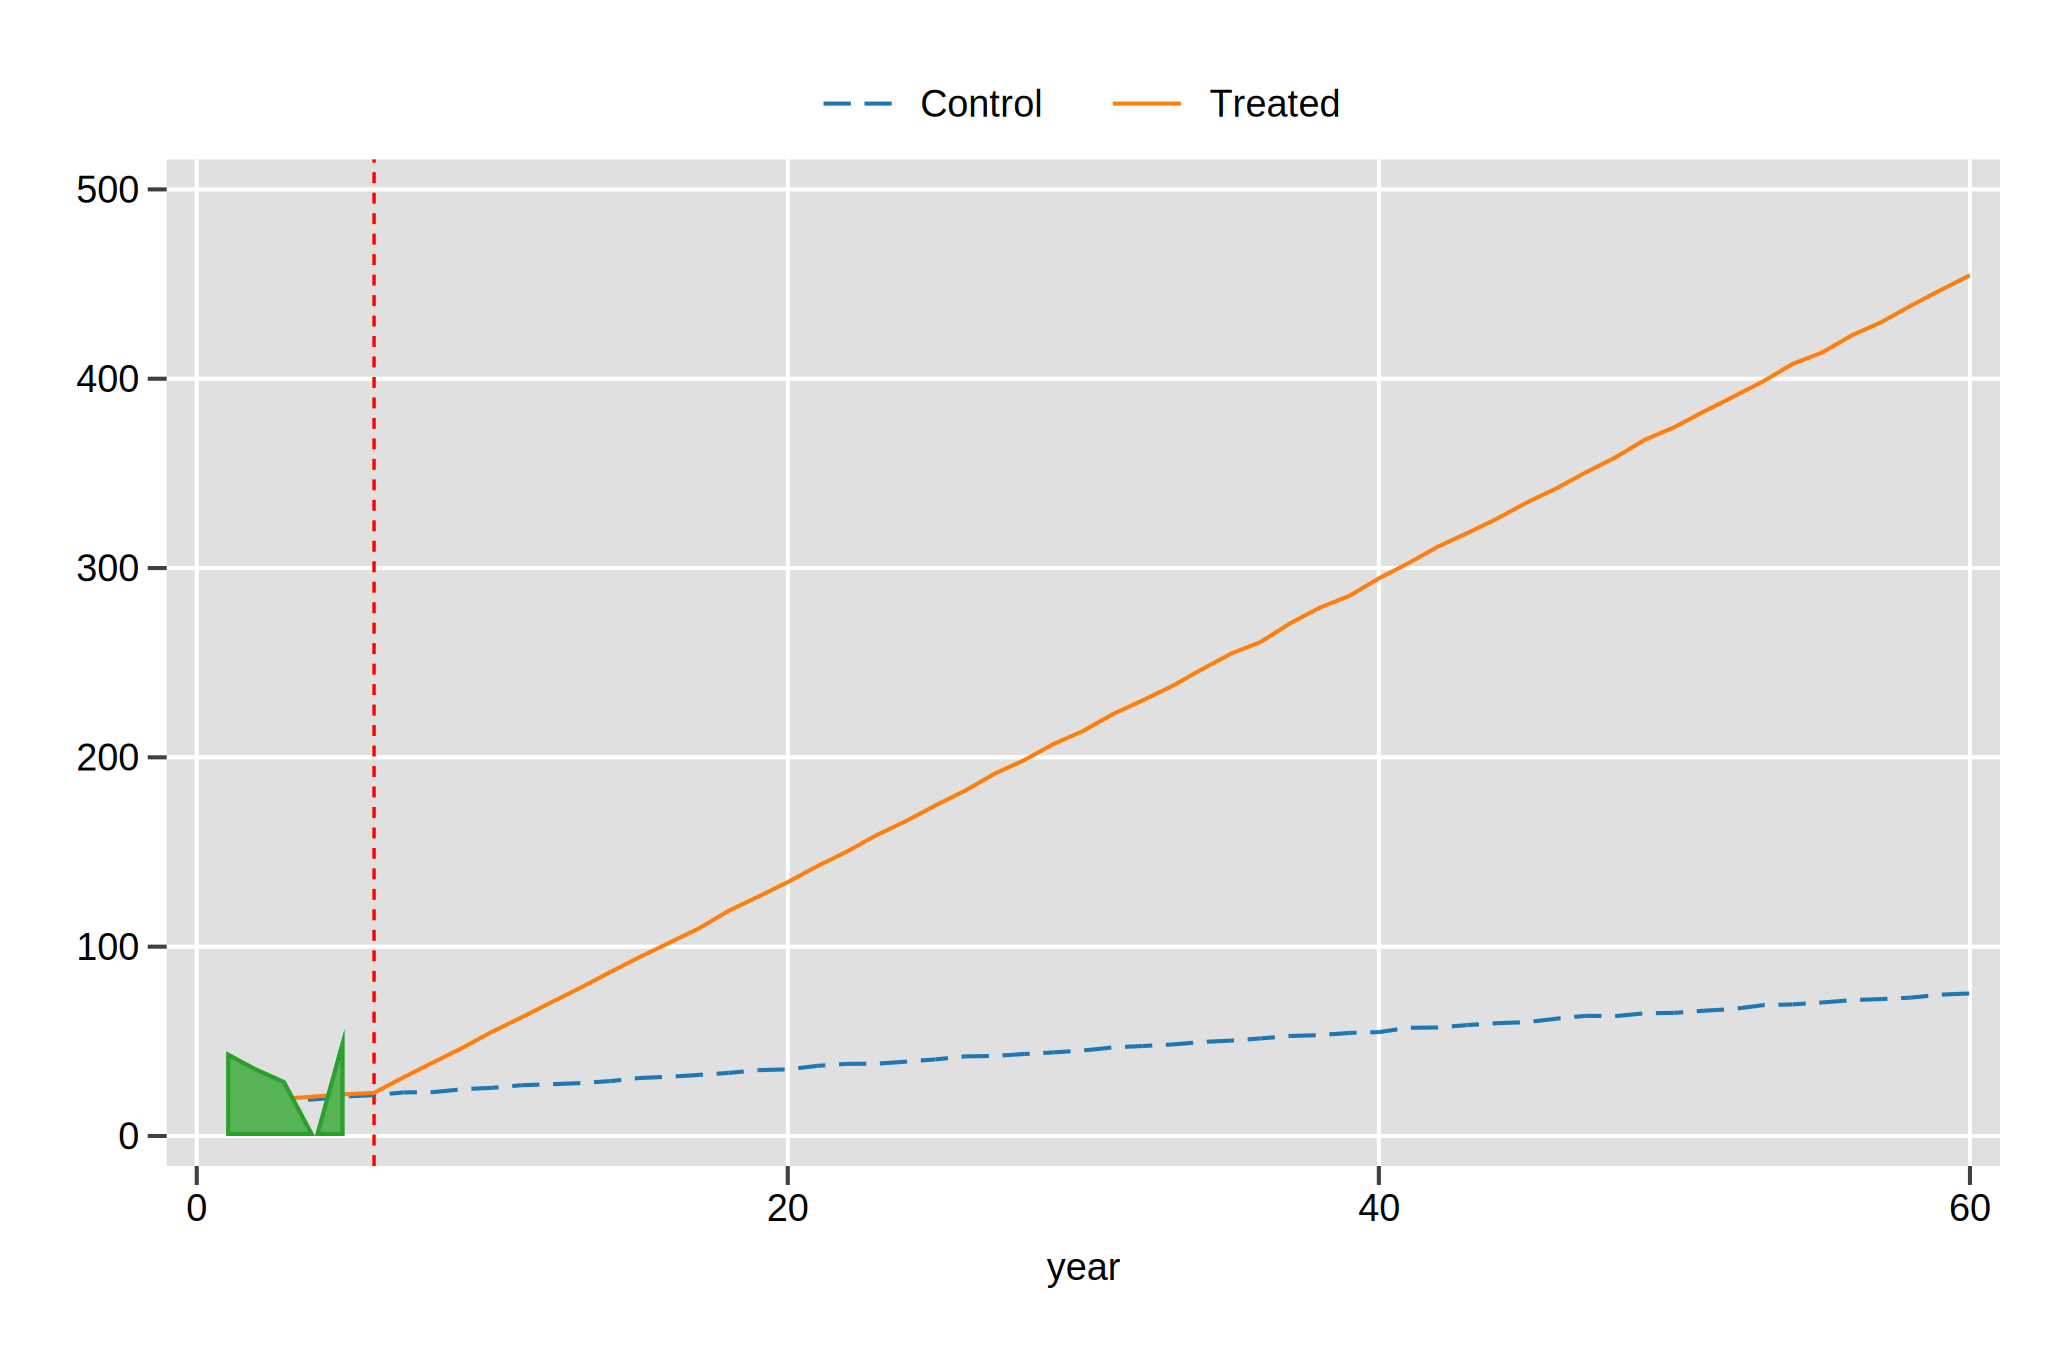

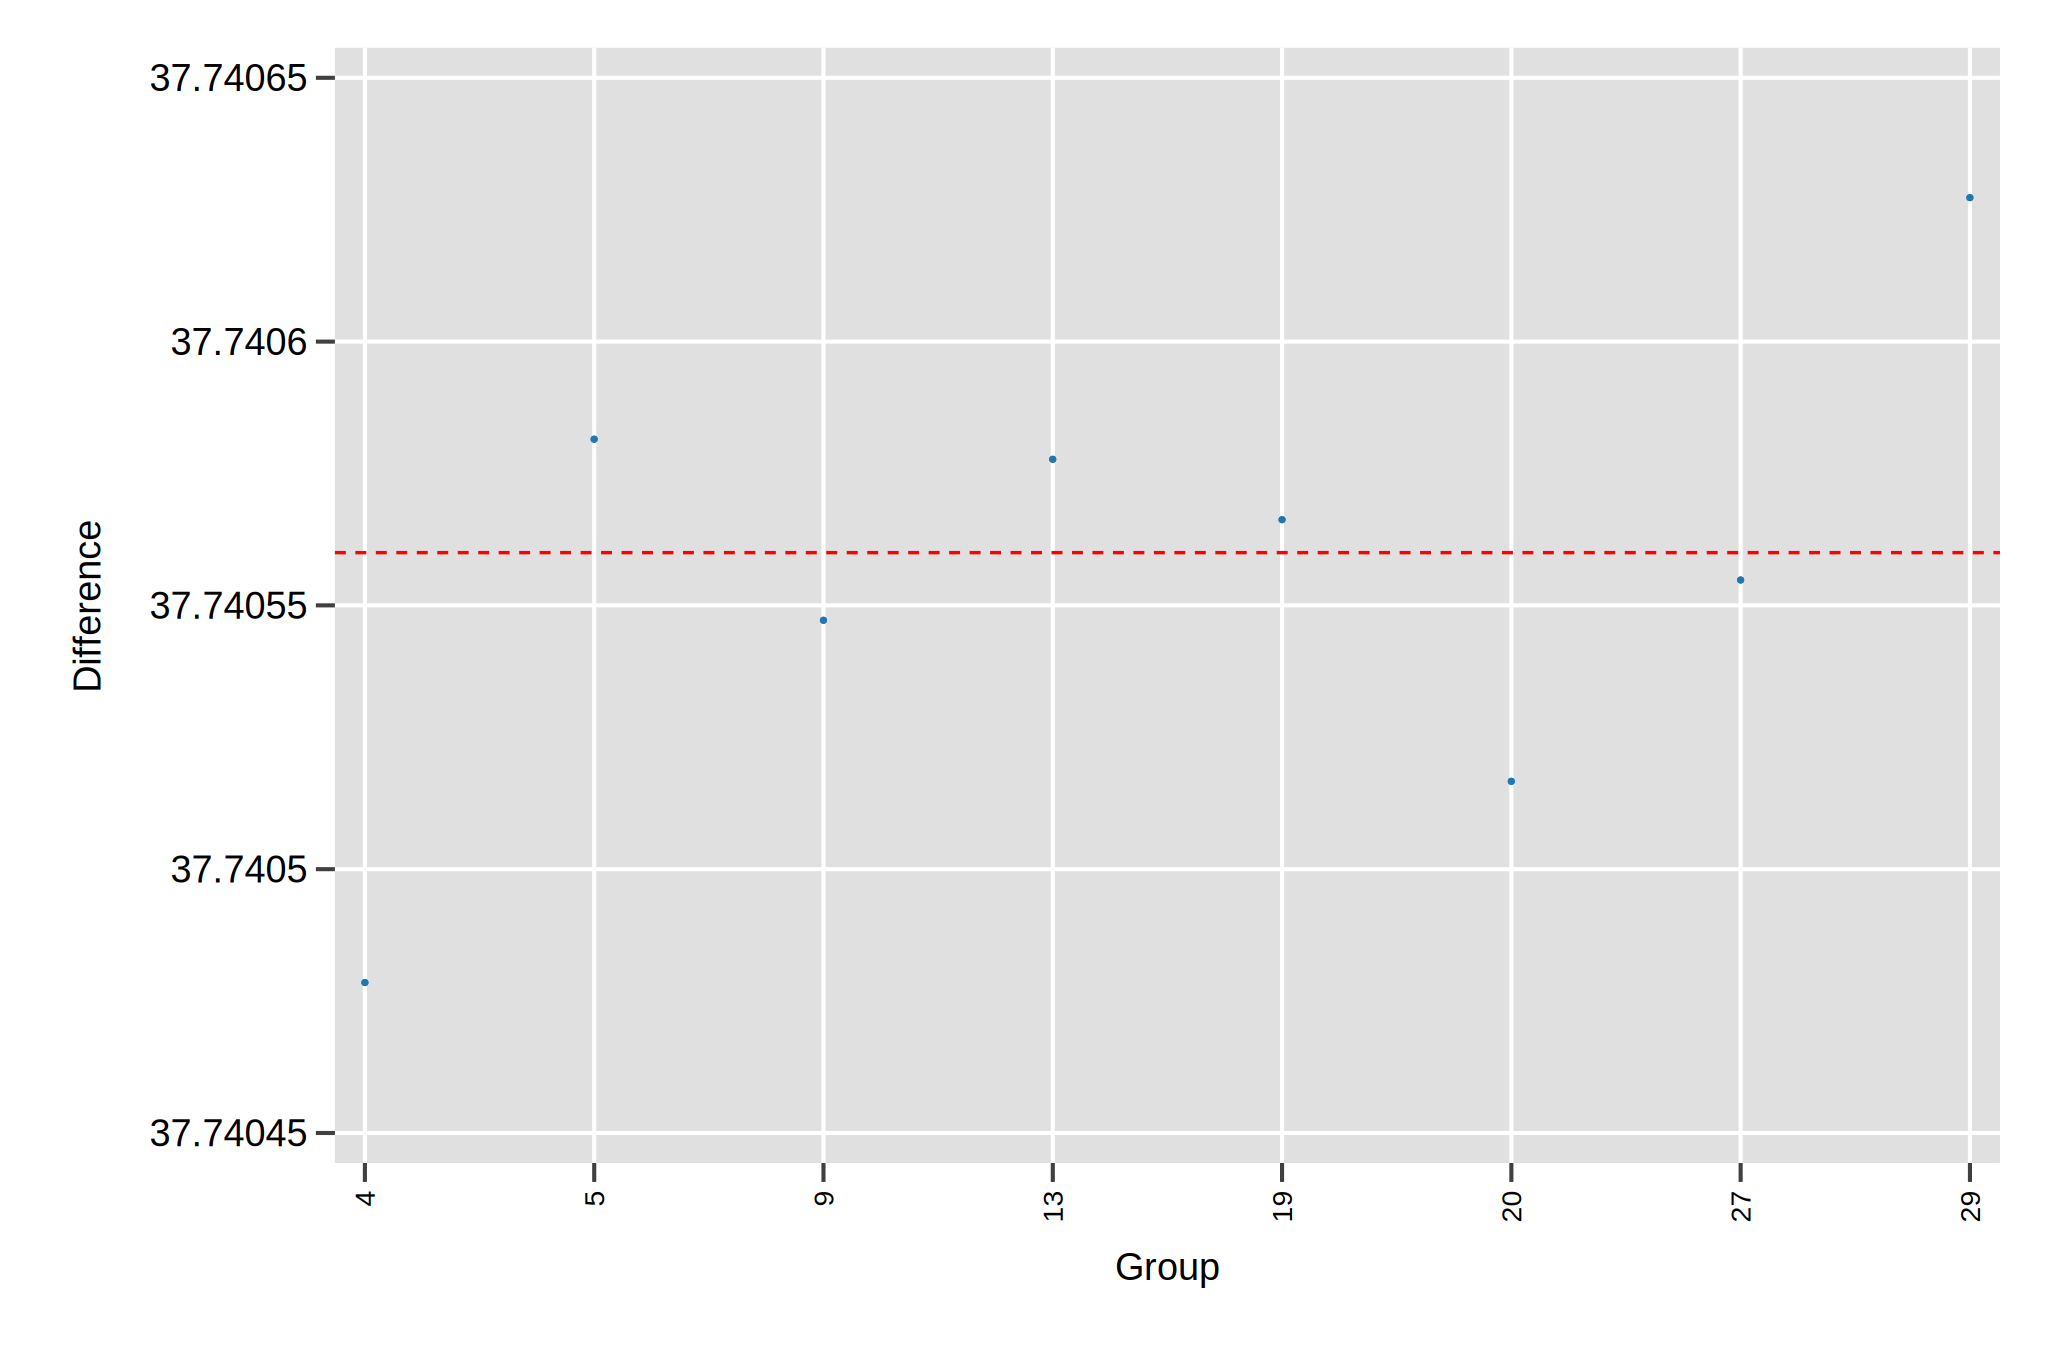

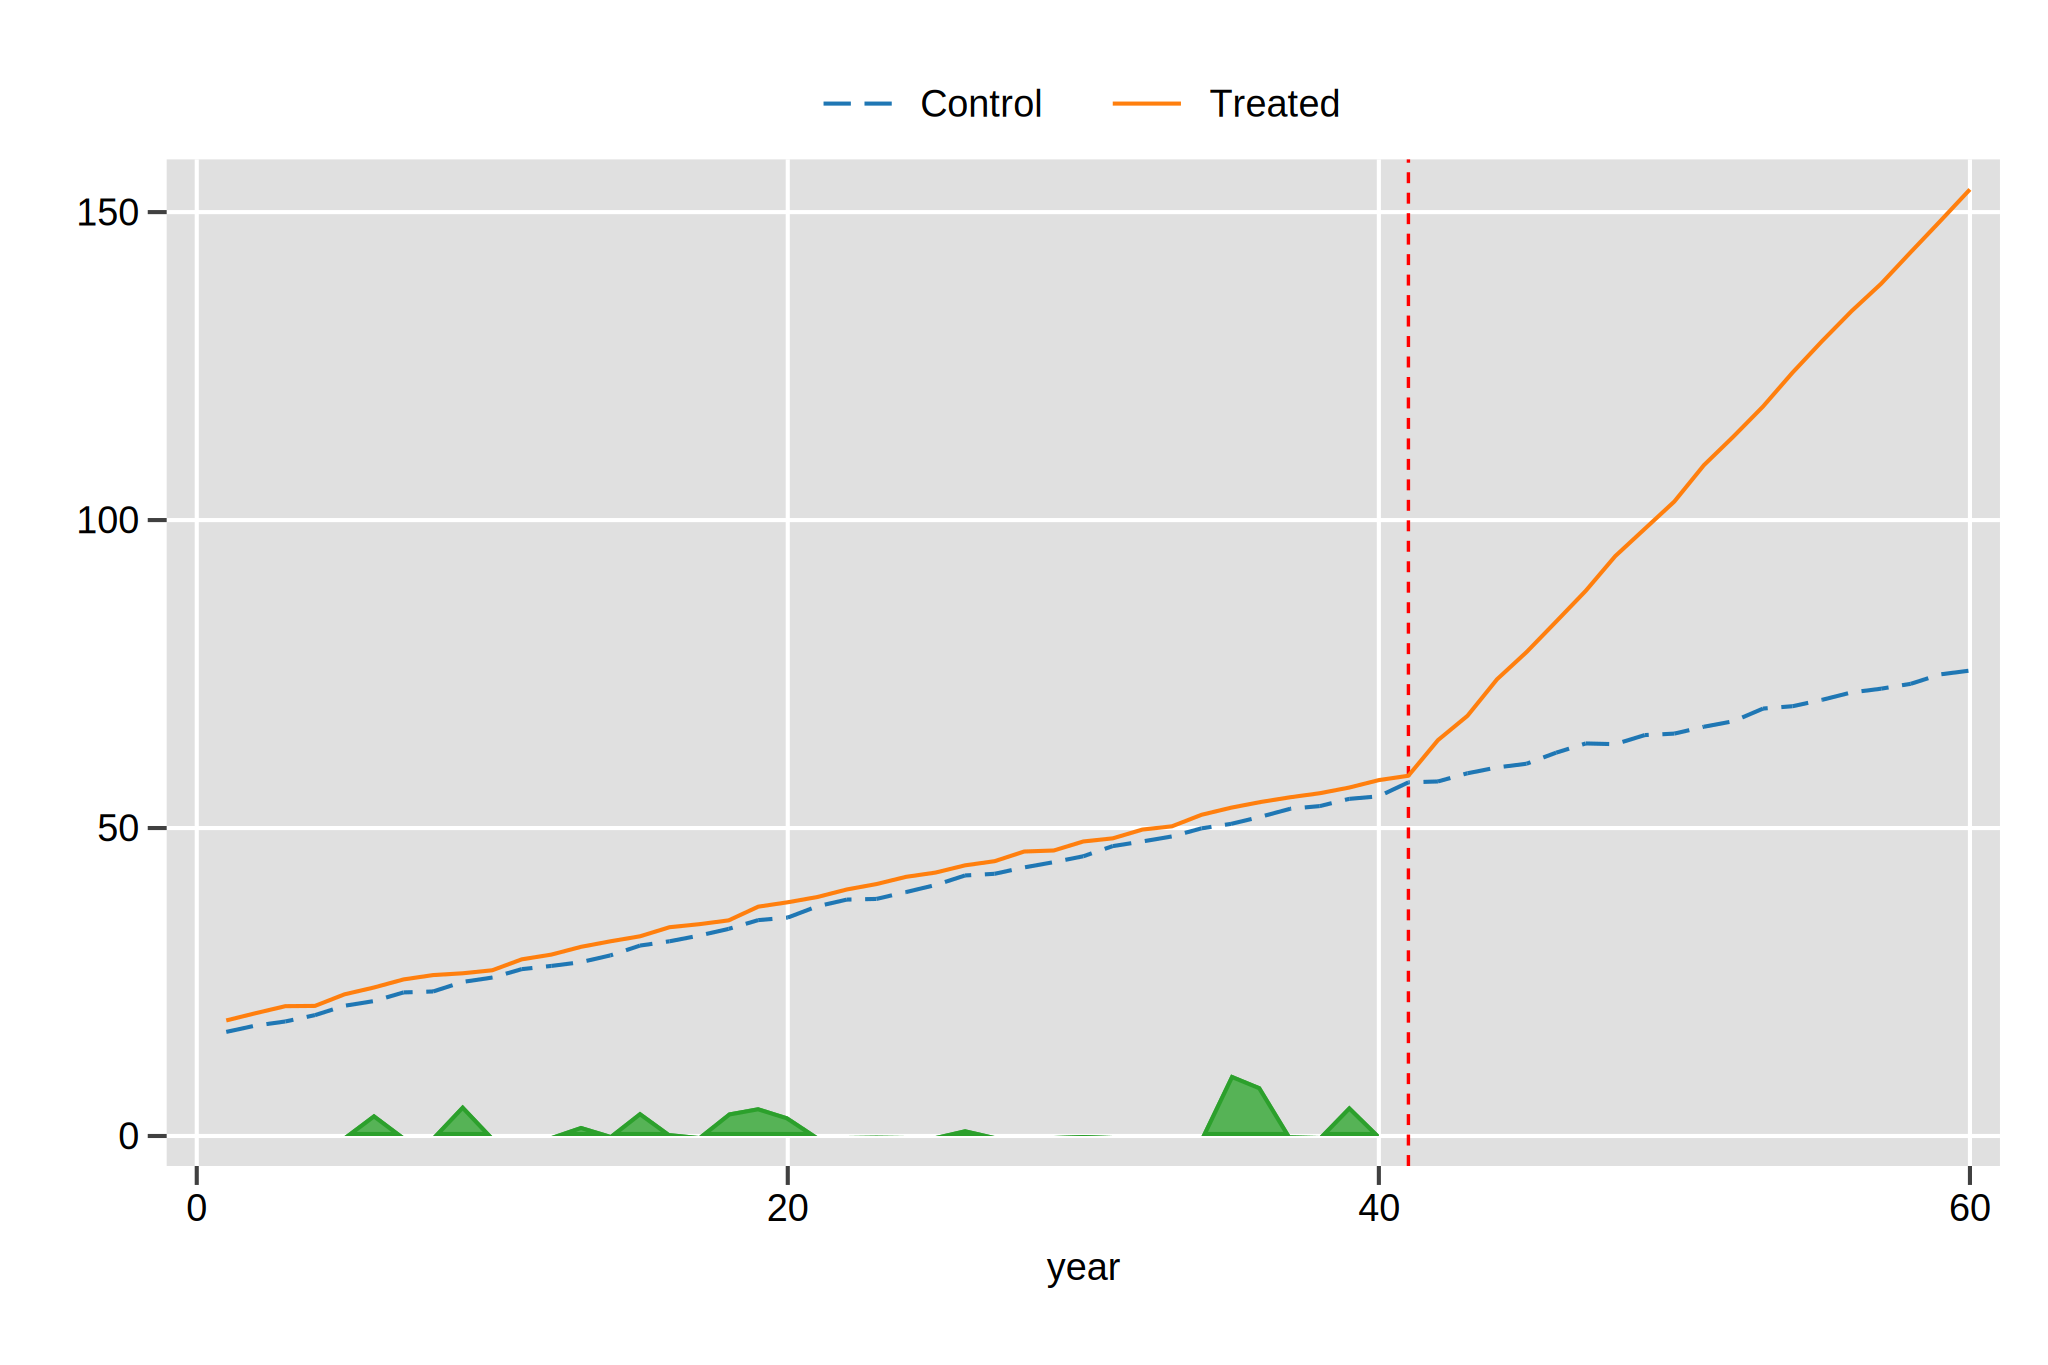

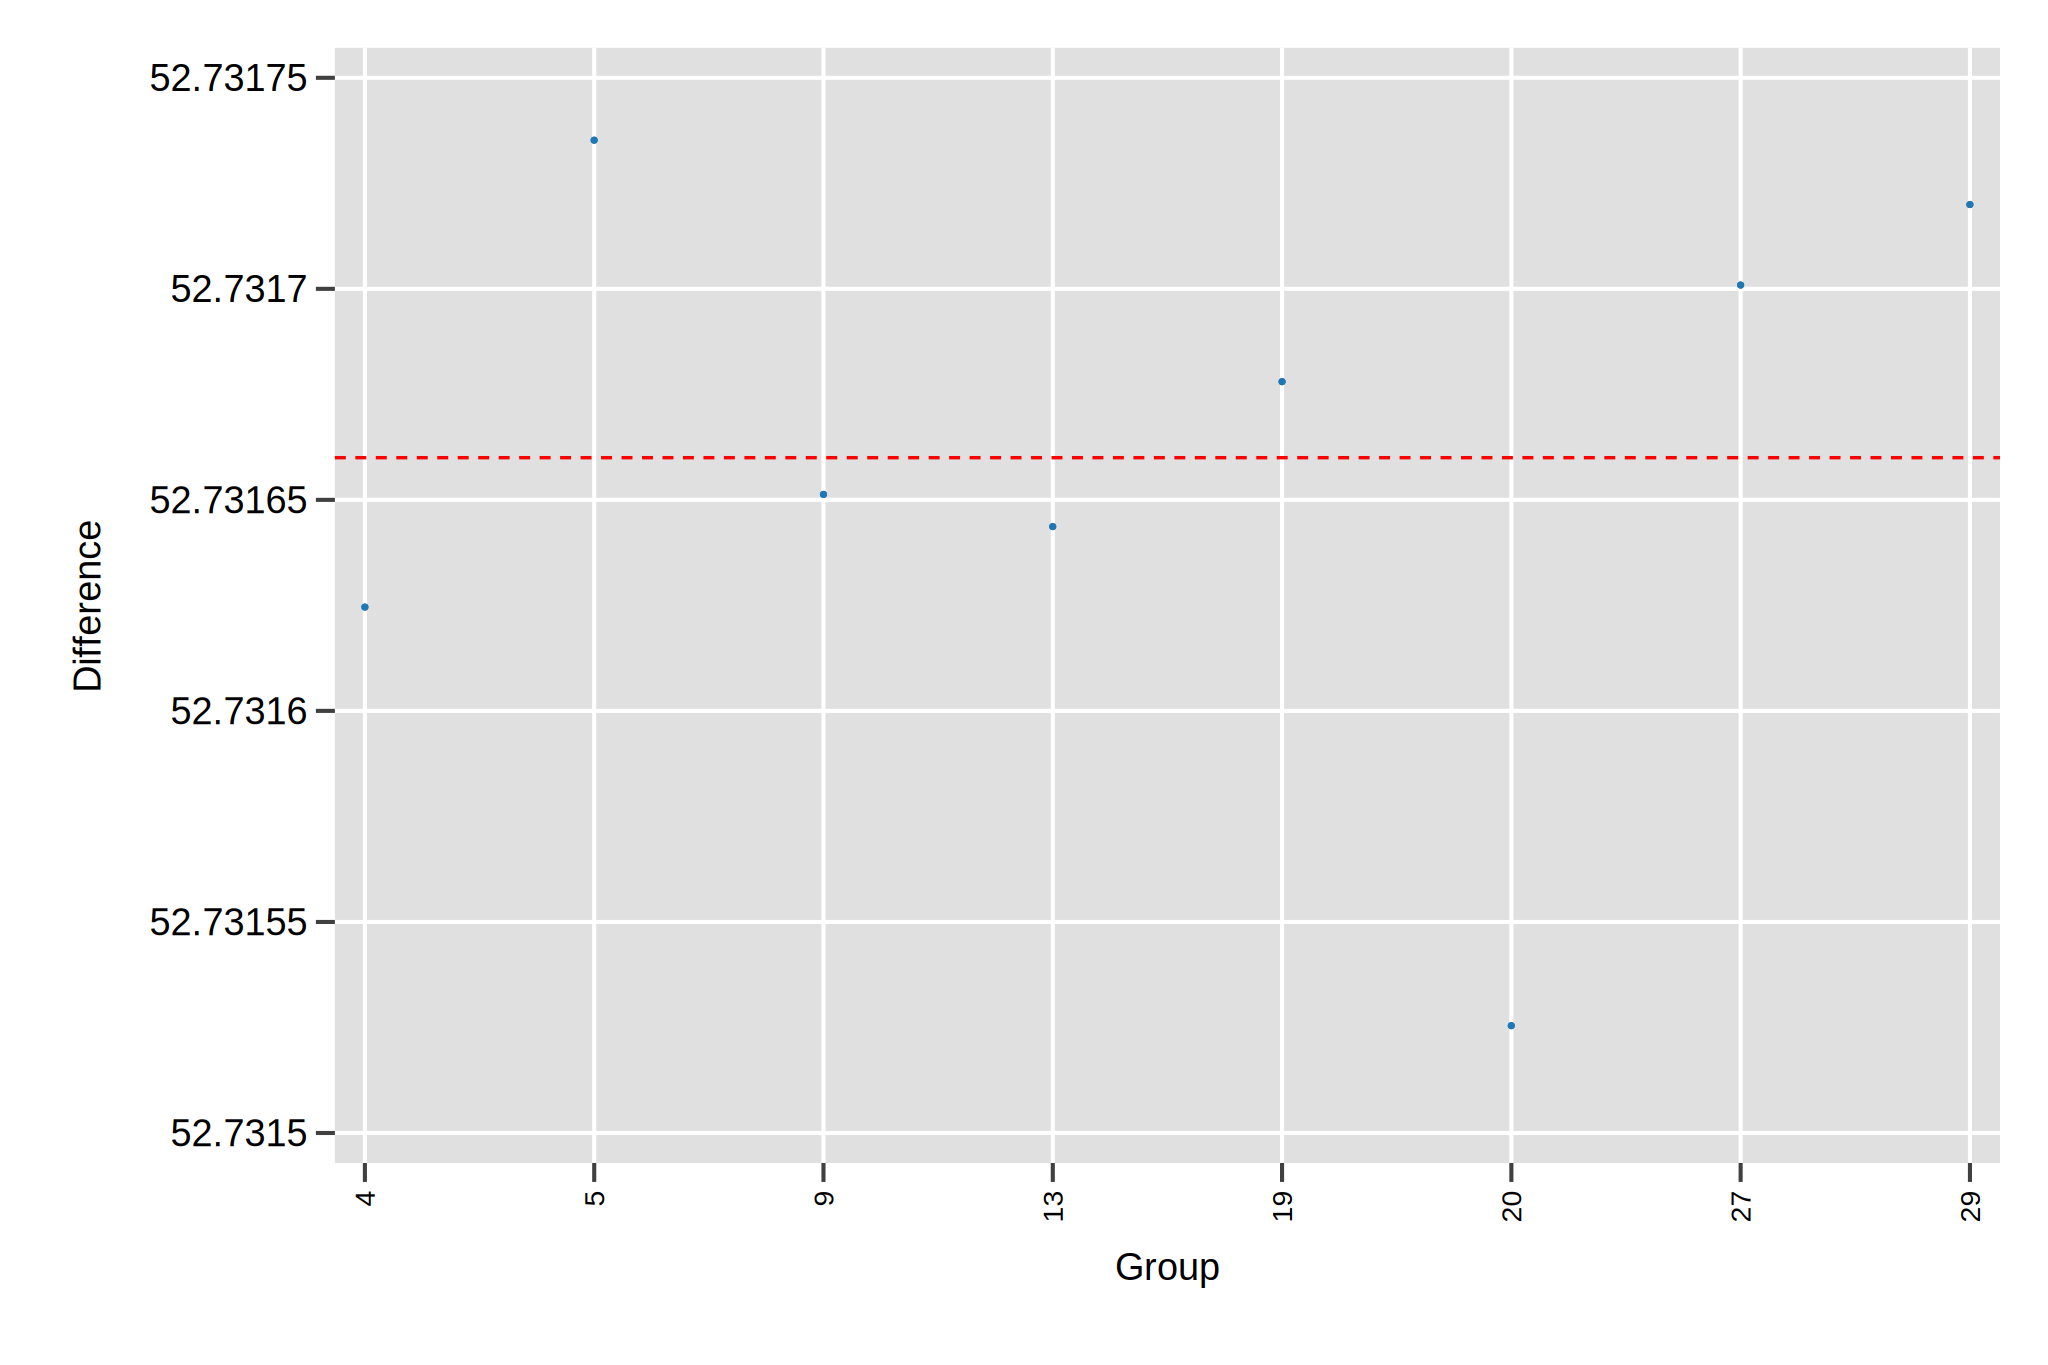

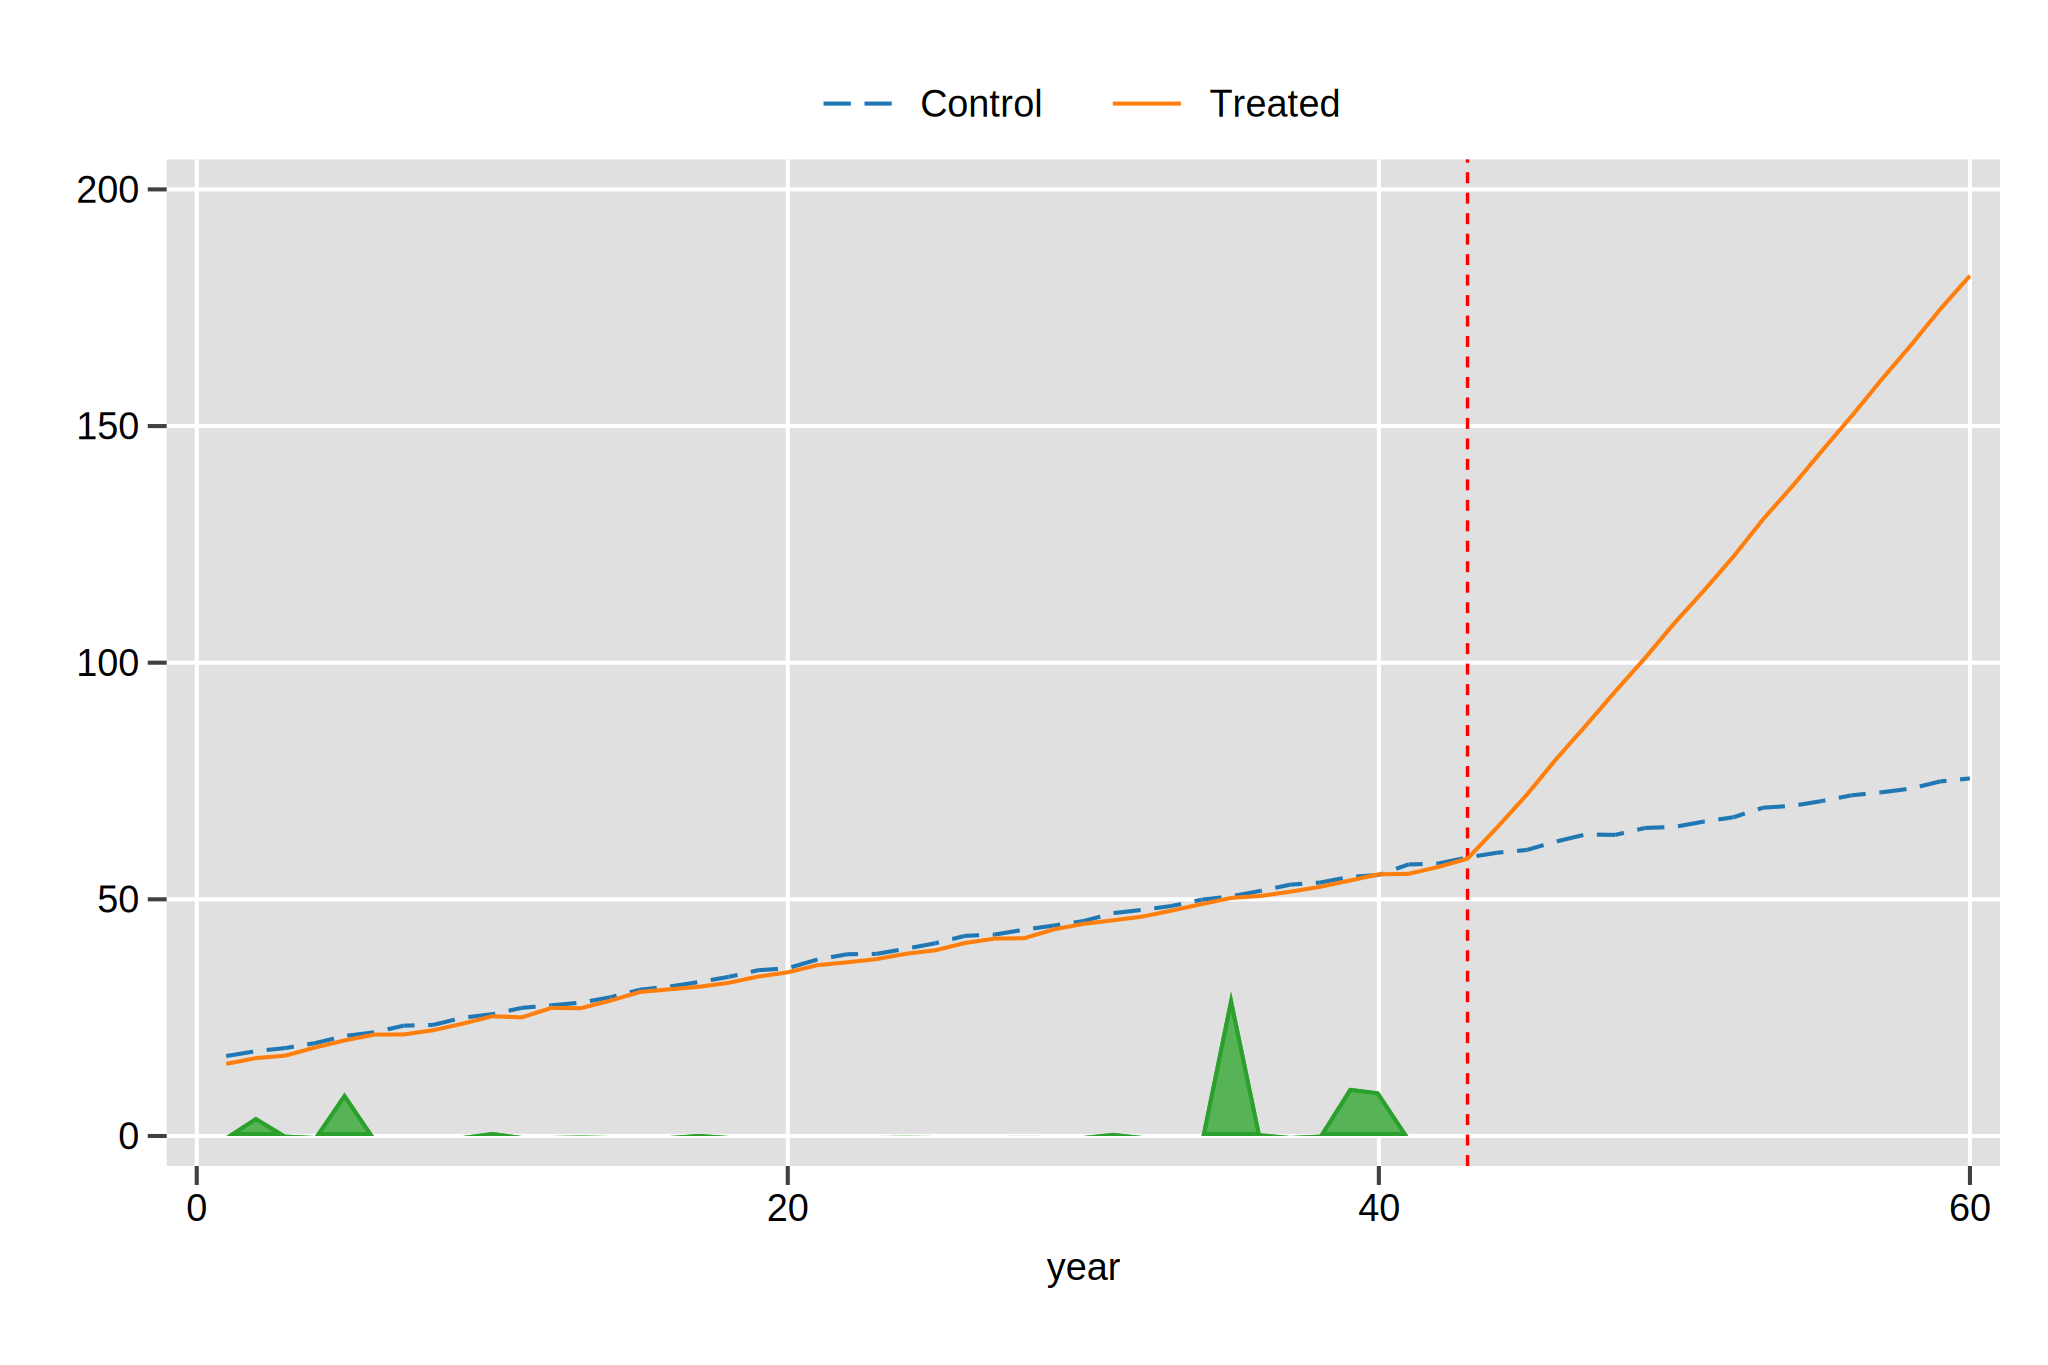

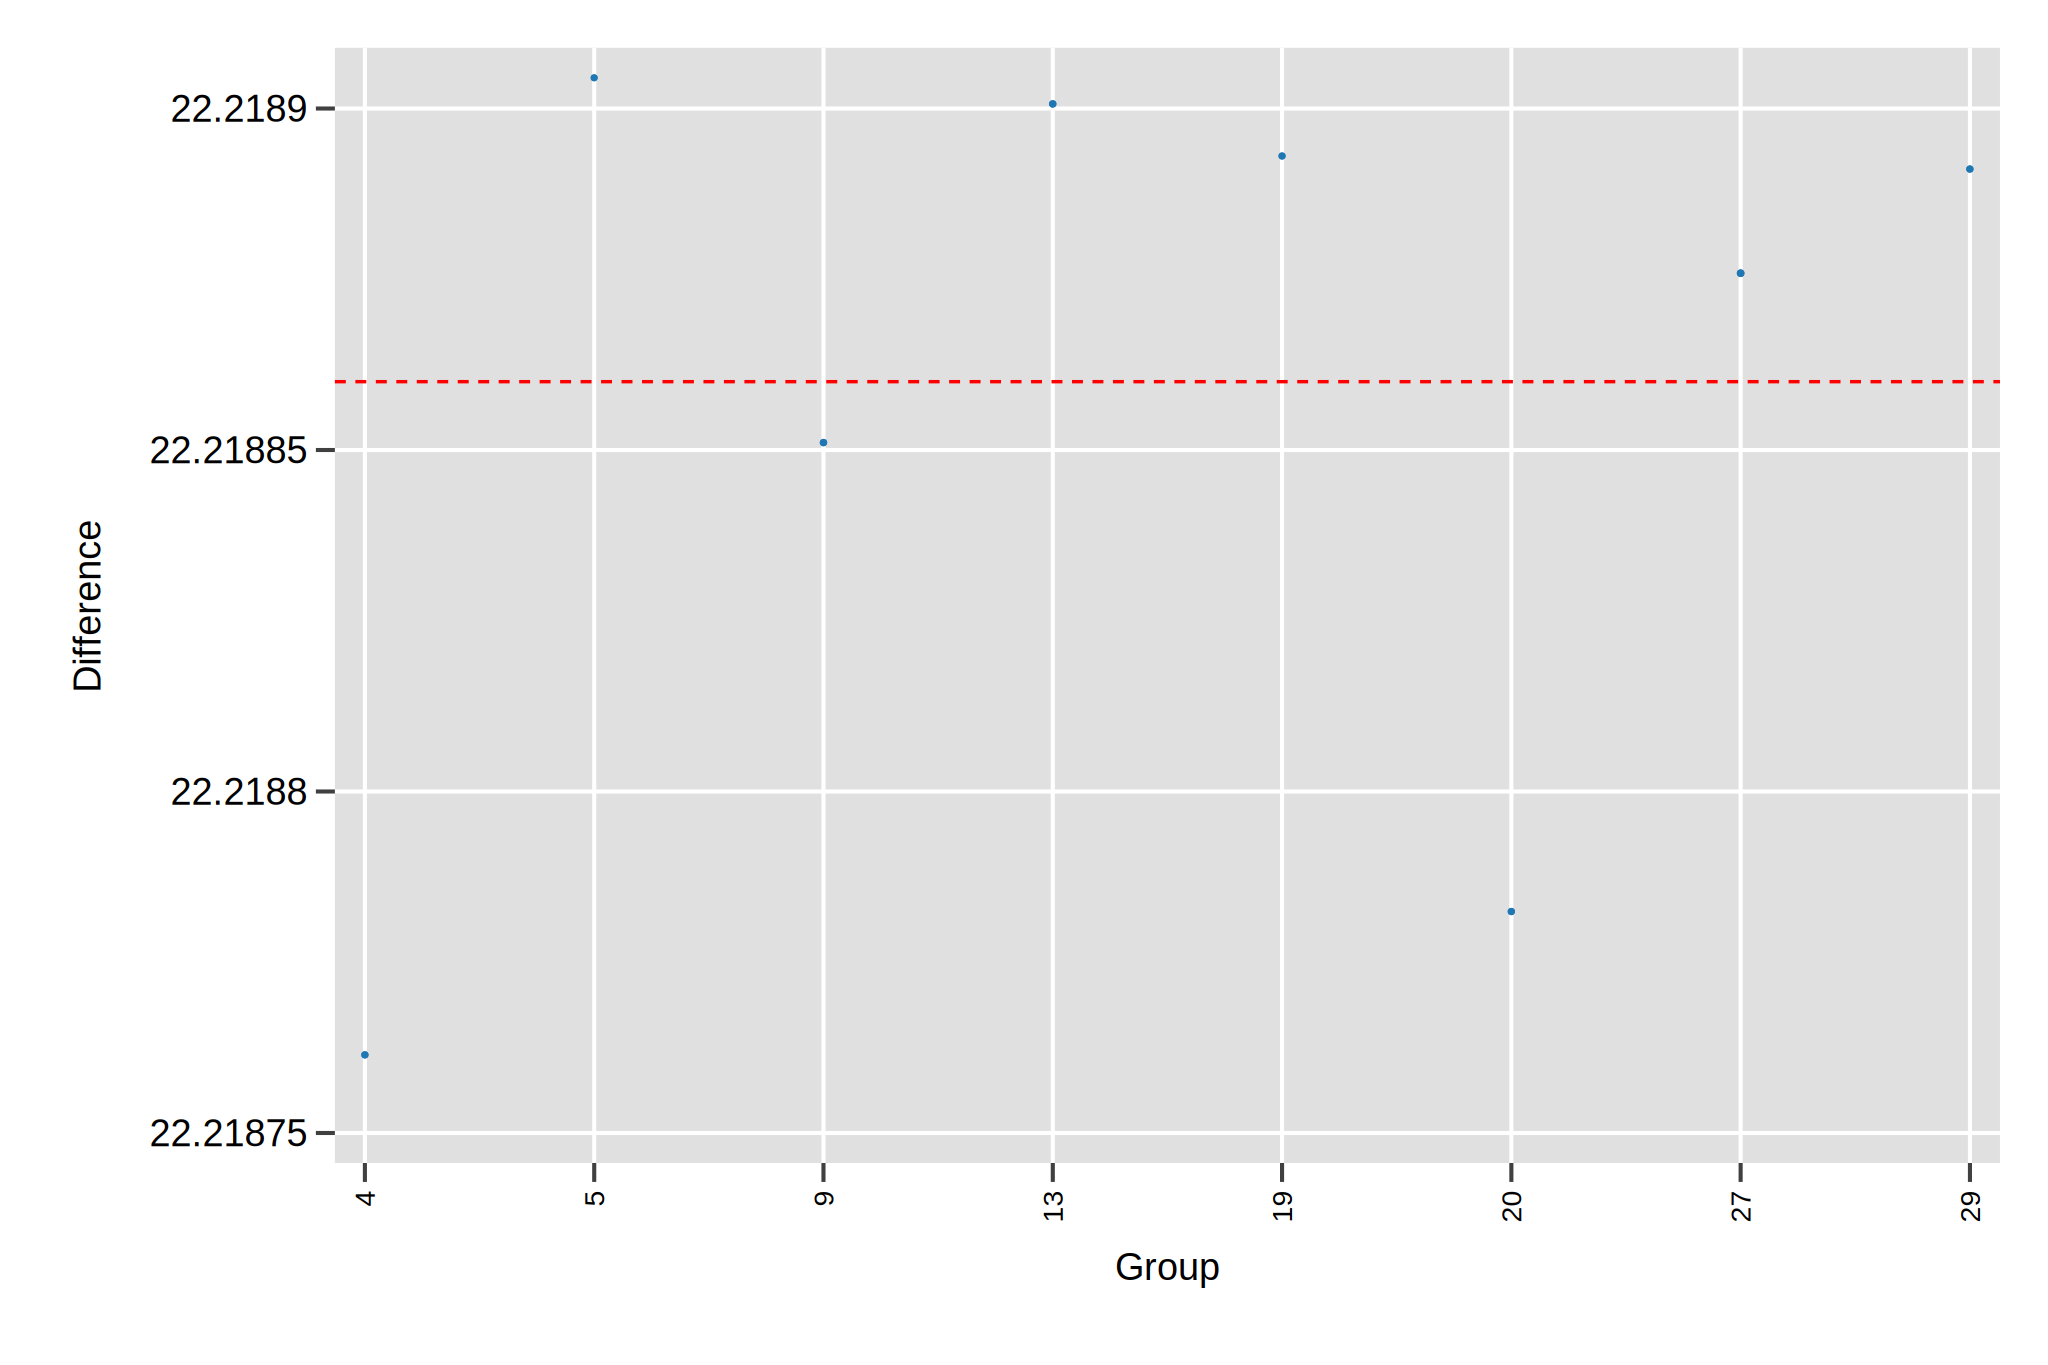

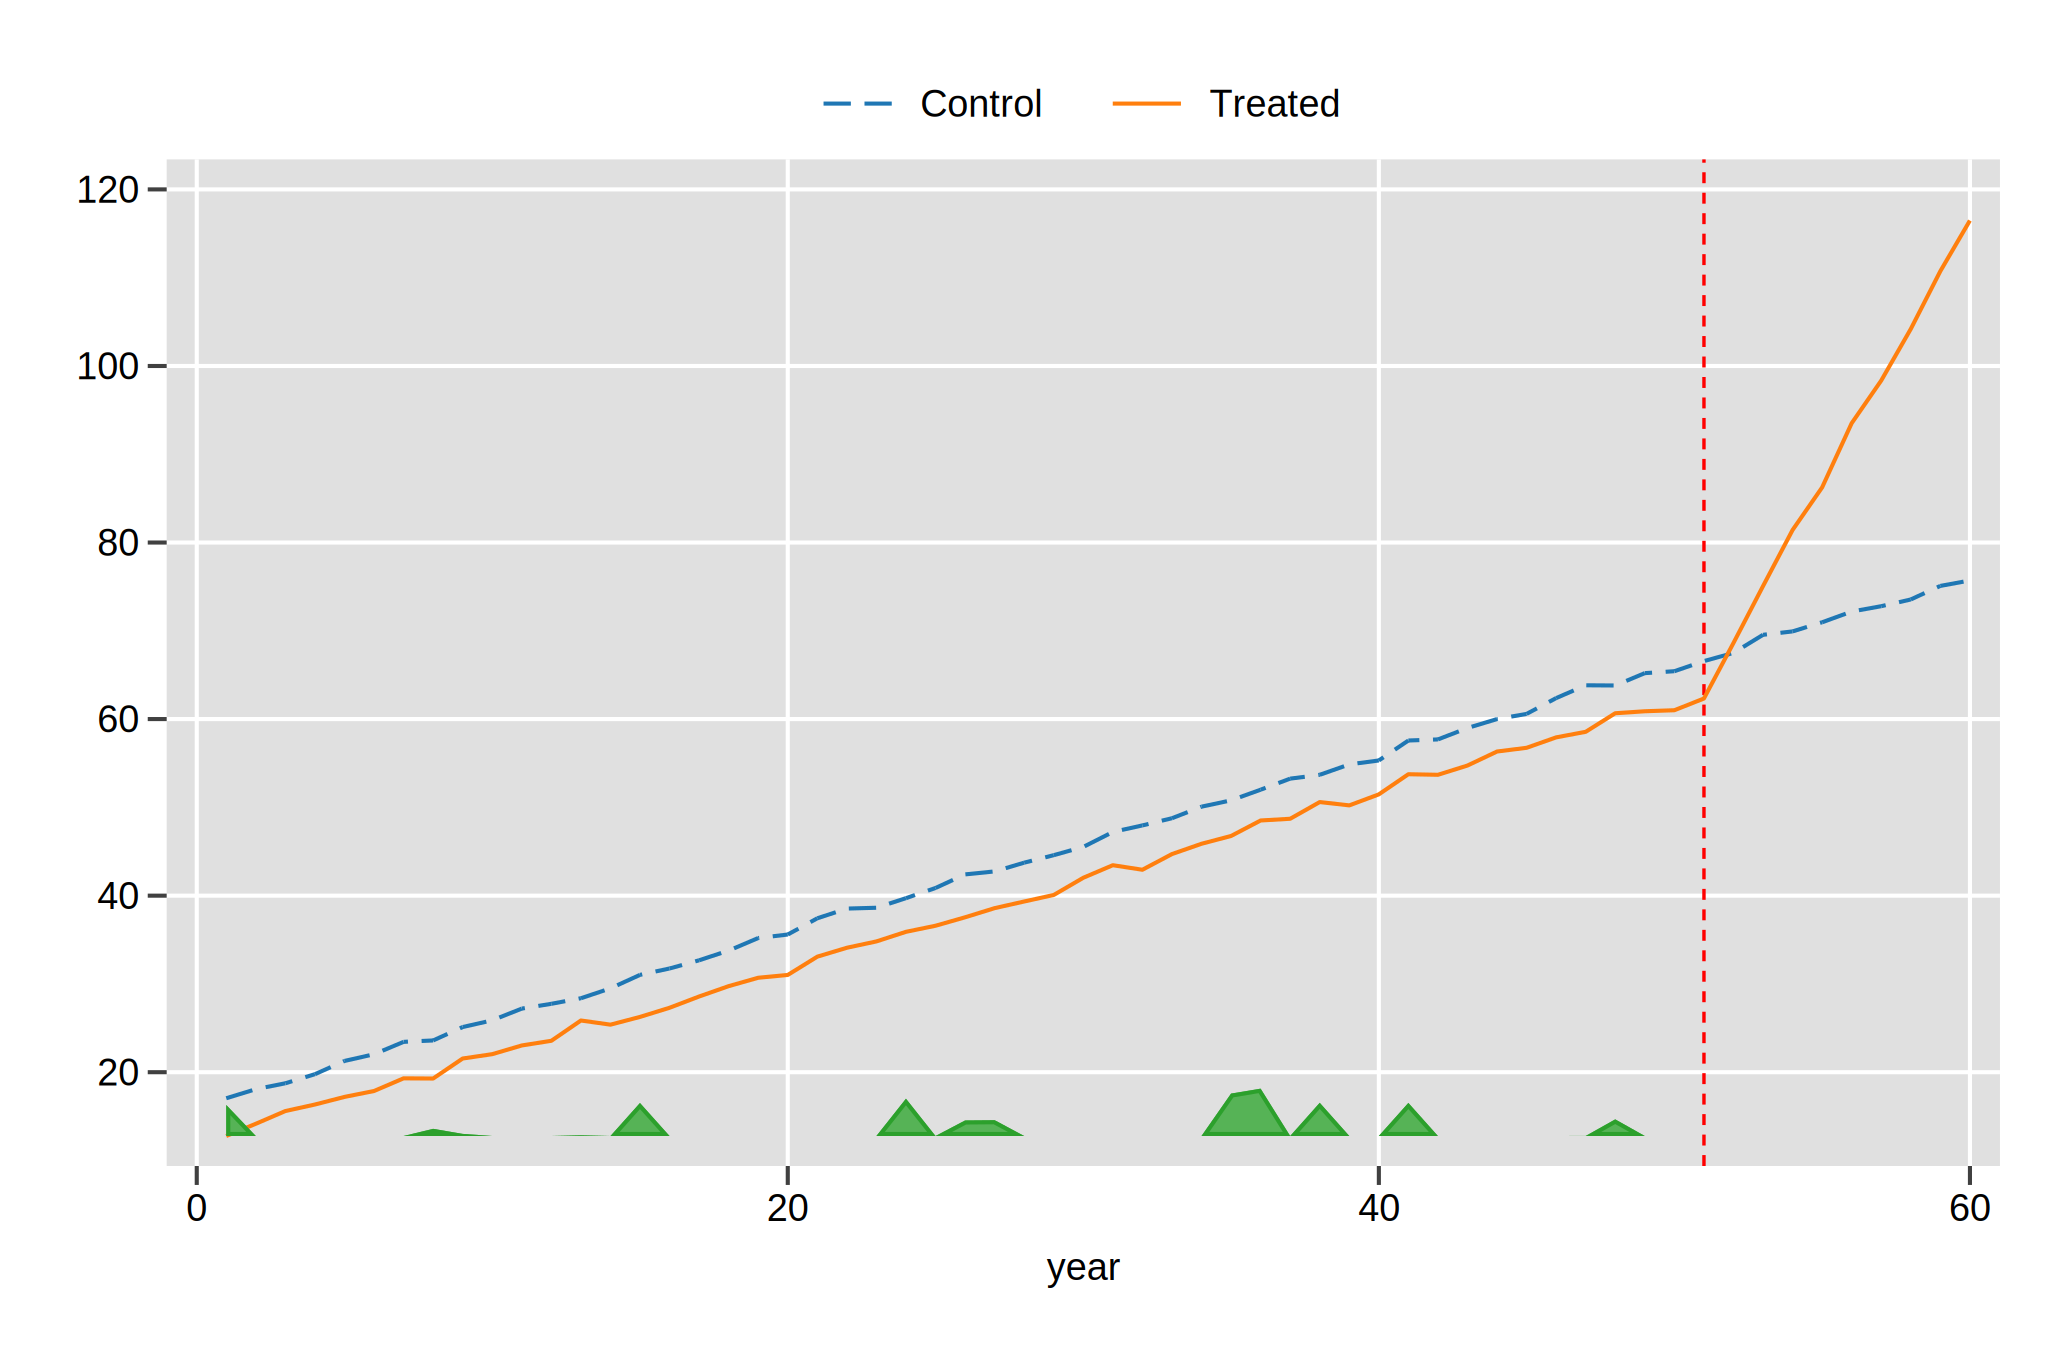

In [11]:
%%stata


// Here cond(s,a,b,[,c]) executes a if x is true and nonmissing, b if x is false, and c if x is missing; a if c is not specified and x evaluates to missing


rename t year

xtline Y, overlay legend(off)

sdid Y id year D, vce(bootstrap) seed($seed_num) 

sdid Y id year D, vce(bootstrap) seed($seed_num) graph g1on

// Notice that here we have staggered treatment, and the command automatically recognizes that

## Notice the weights above

In [12]:
%%stata



**********************************
*                                *
*                                *
*            Exercise            *
*                                *
*                                *
**********************************

// Let's use sdid to perform the same analysis we did in Recitation 6
use https://github.com/scunning1975/mixtape/raw/master/texas.dta, clear

gen treated = 0
replace treated = 1 if year >= 1993 & statefip == 48



. 
. 
. 
. **********************************
. *                                *
. *                                *
. *            Exercise            *
. *                                *
. *                                *
. **********************************
. 
. // Let's use sdid to perform the same analysis we did in Recitation 6
. use https://github.com/scunning1975/mixtape/raw/master/texas.dta, clear

. 
. gen treated = 0

. replace treated = 1 if year >= 1993 & statefip == 48
(8 real changes made)

. 



. 
. 
. // 1. Recreate the plot from Recitation 6 using sdid instead of synth. Make s
> ure to use the synthetic control method.
. 
. #delimit ;
delimiter now ;
. local scheme = "gg_tableau" ;

. sdid bmprison state year treated , vce(placebo) reps(100) seed($seed_num) met
> hod(sc) g1on
>      graph g1_opt(xtitle("") scheme(`scheme')) 
>      g2_opt( ytitle("Packs per capita") 
>             xtitle("") text(15000 1995 "ATT = `e(ATT)'" " SE = (`e(se)')") sc
> heme(`scheme'))
>     graph_export(sdid_, .png);
Placebo replications (100). This may take some time.
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5
..................................................     50
..................................................     100


Synthetic Control

-----------------------------------------------------------------------------
    bmprison |     ATT     Std. Err.     t      P>|t|    [95% Conf. Interval]
-------------+---------------------------------------------------------------
     treat

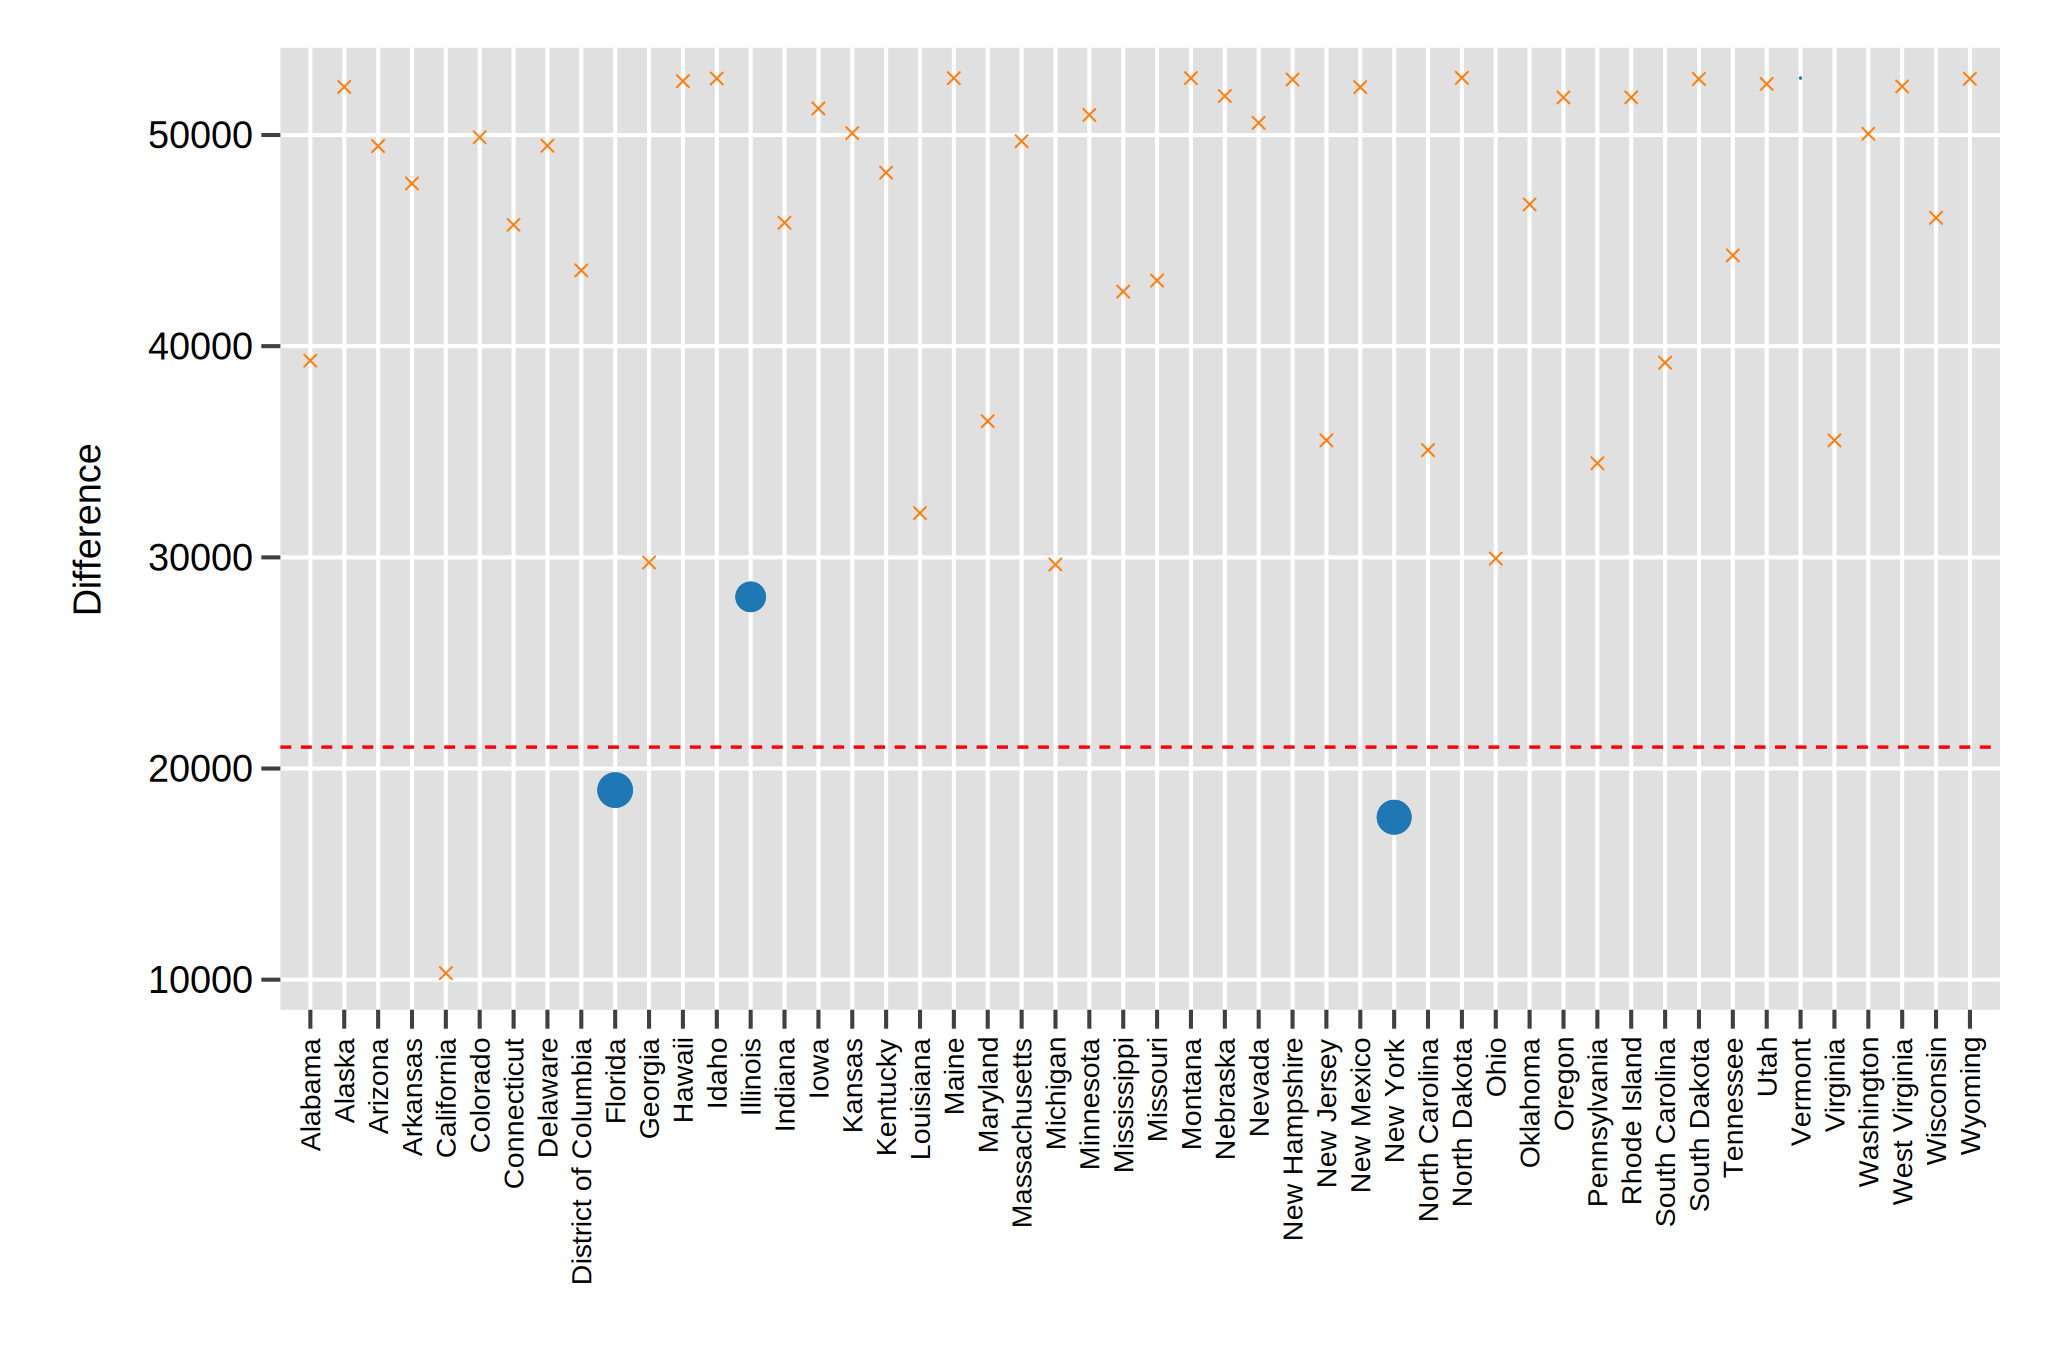

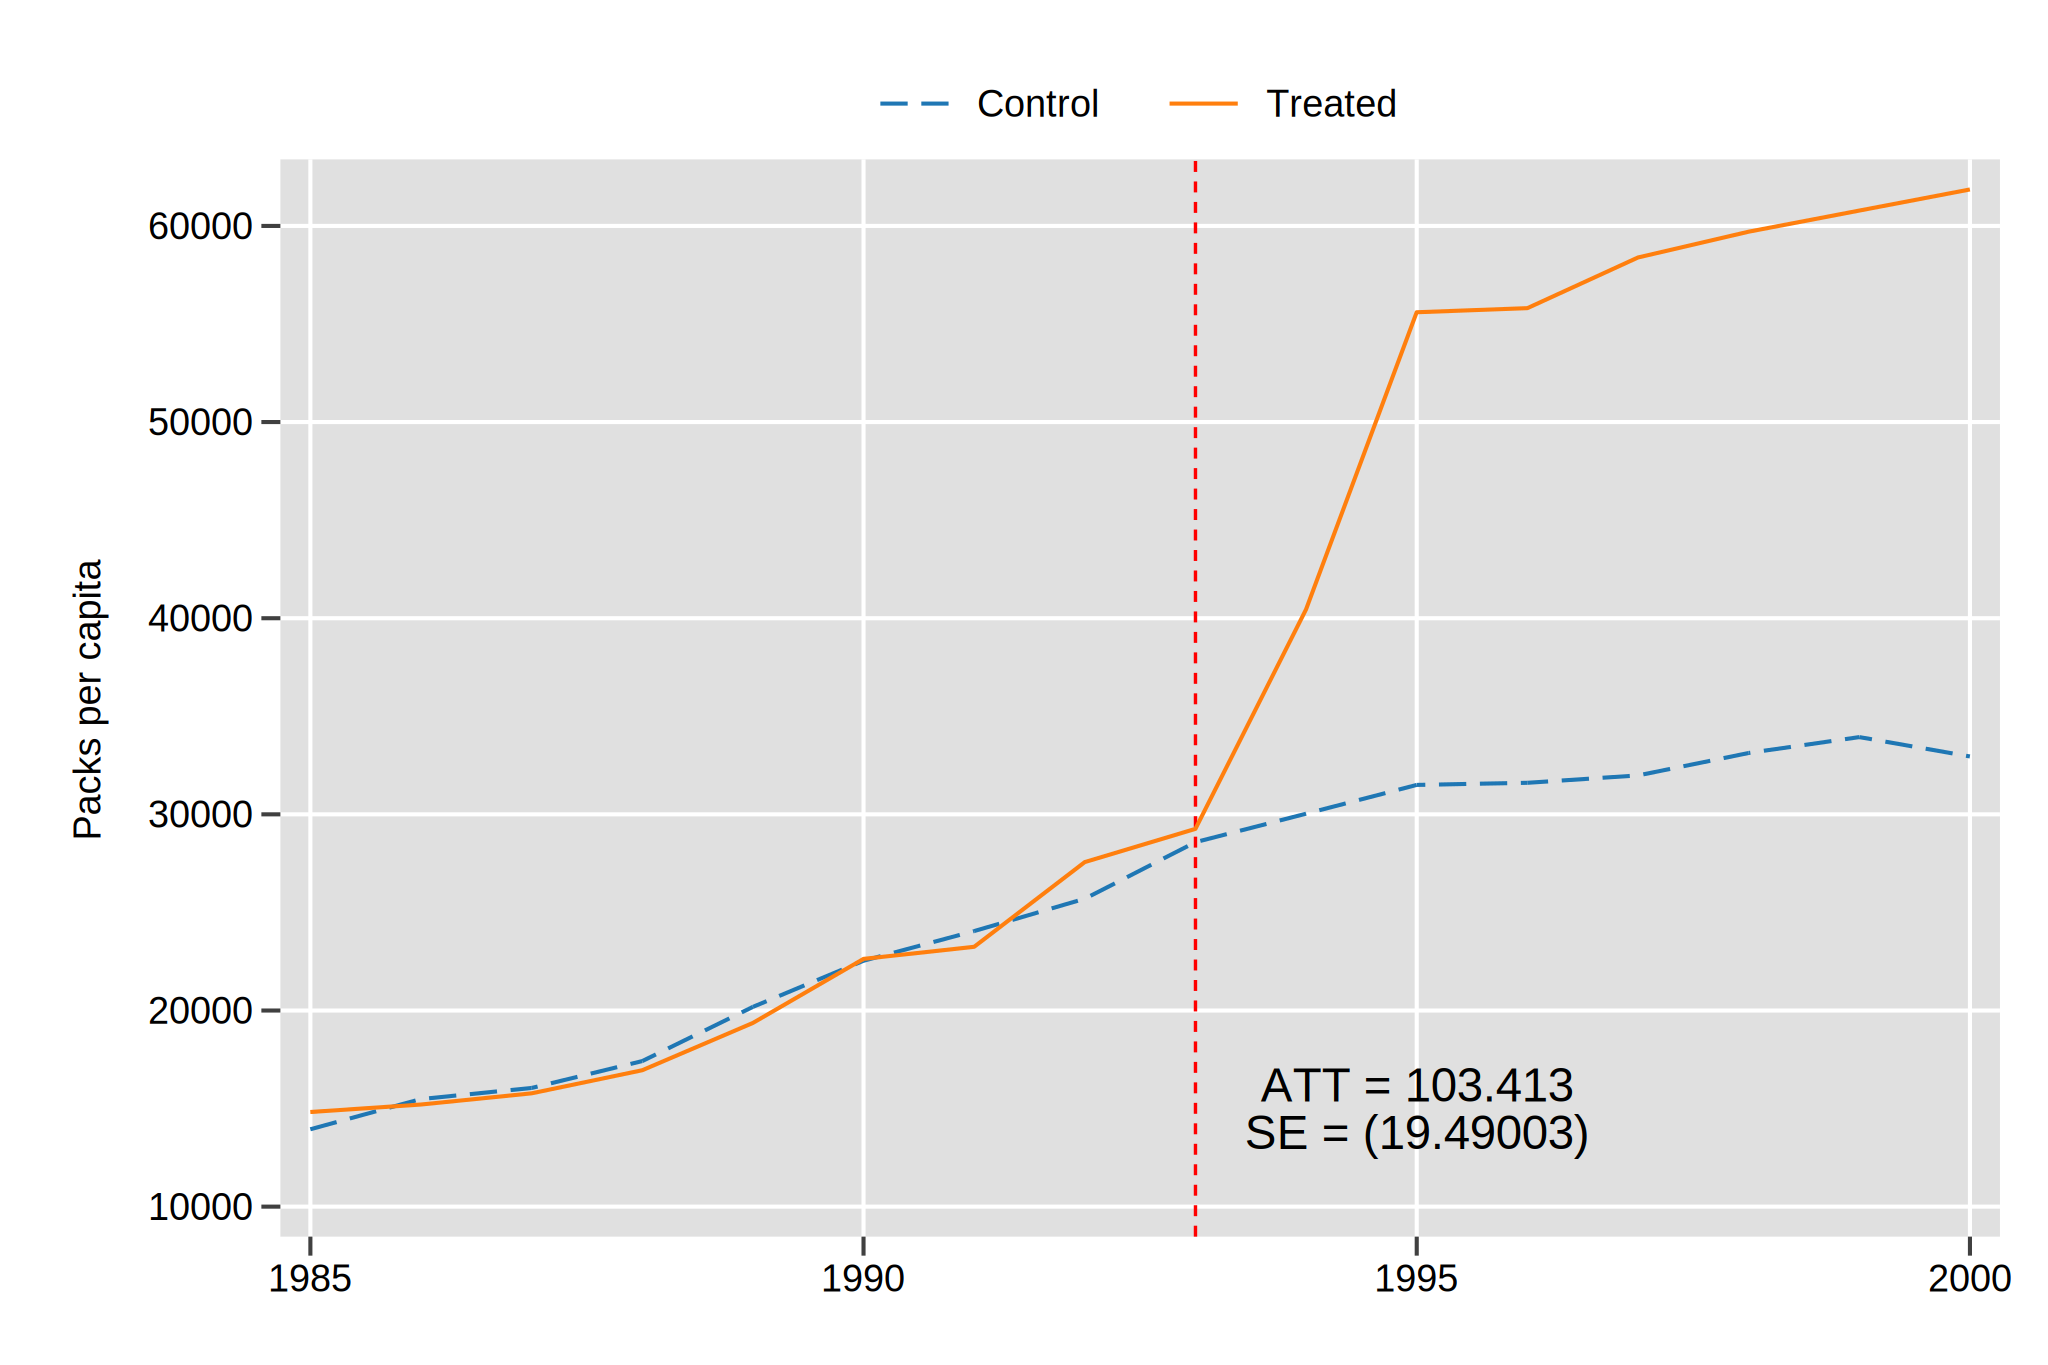

In [13]:
%%stata


// 1. Recreate the plot from Recitation 6 using sdid instead of synth. Make sure to use the synthetic control method.

#delimit ;

local scheme = "gg_tableau" ;

sdid bmprison state year treated , vce(placebo) reps(100) seed($seed_num) method(sc) g1on
     graph g1_opt(xtitle("") scheme(`scheme')) 
     g2_opt( ytitle("Packs per capita") 
            xtitle("") text(15000 1995 "ATT = `e(ATT)'" " SE = (`e(se)')") scheme(`scheme'))
    graph_export(sdid_, .png);
	
#delimit cr


. 
. // 2. Use sdid instead and compare the ATT, the weights, and the trends plot.
. 
. #delimit ;
delimiter now ;
. local scheme = "gg_tableau" ;

. sdid bmprison state year treated , vce(placebo) reps(100) seed($seed_num) met
> hod(sdid) g1on
>      graph g1_opt(xtitle("") scheme(`scheme')) 
>      g2_opt( ytitle("Packs per capita") 
>             xtitle("") text(15000 1995 "ATT = `e(ATT)'" " SE = (`e(se)')") sc
> heme(`scheme'))
>     graph_export(sdid_, .png);
Placebo replications (100). This may take some time.
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5
..................................................     50
..................................................     100


Synthetic Difference-in-Differences Estimator

-----------------------------------------------------------------------------
    bmprison |     ATT     Std. Err.     t      P>|t|    [95% Conf. Interval]
-------------+---------------------------------------------------------------
     treated |  1.95e+04  

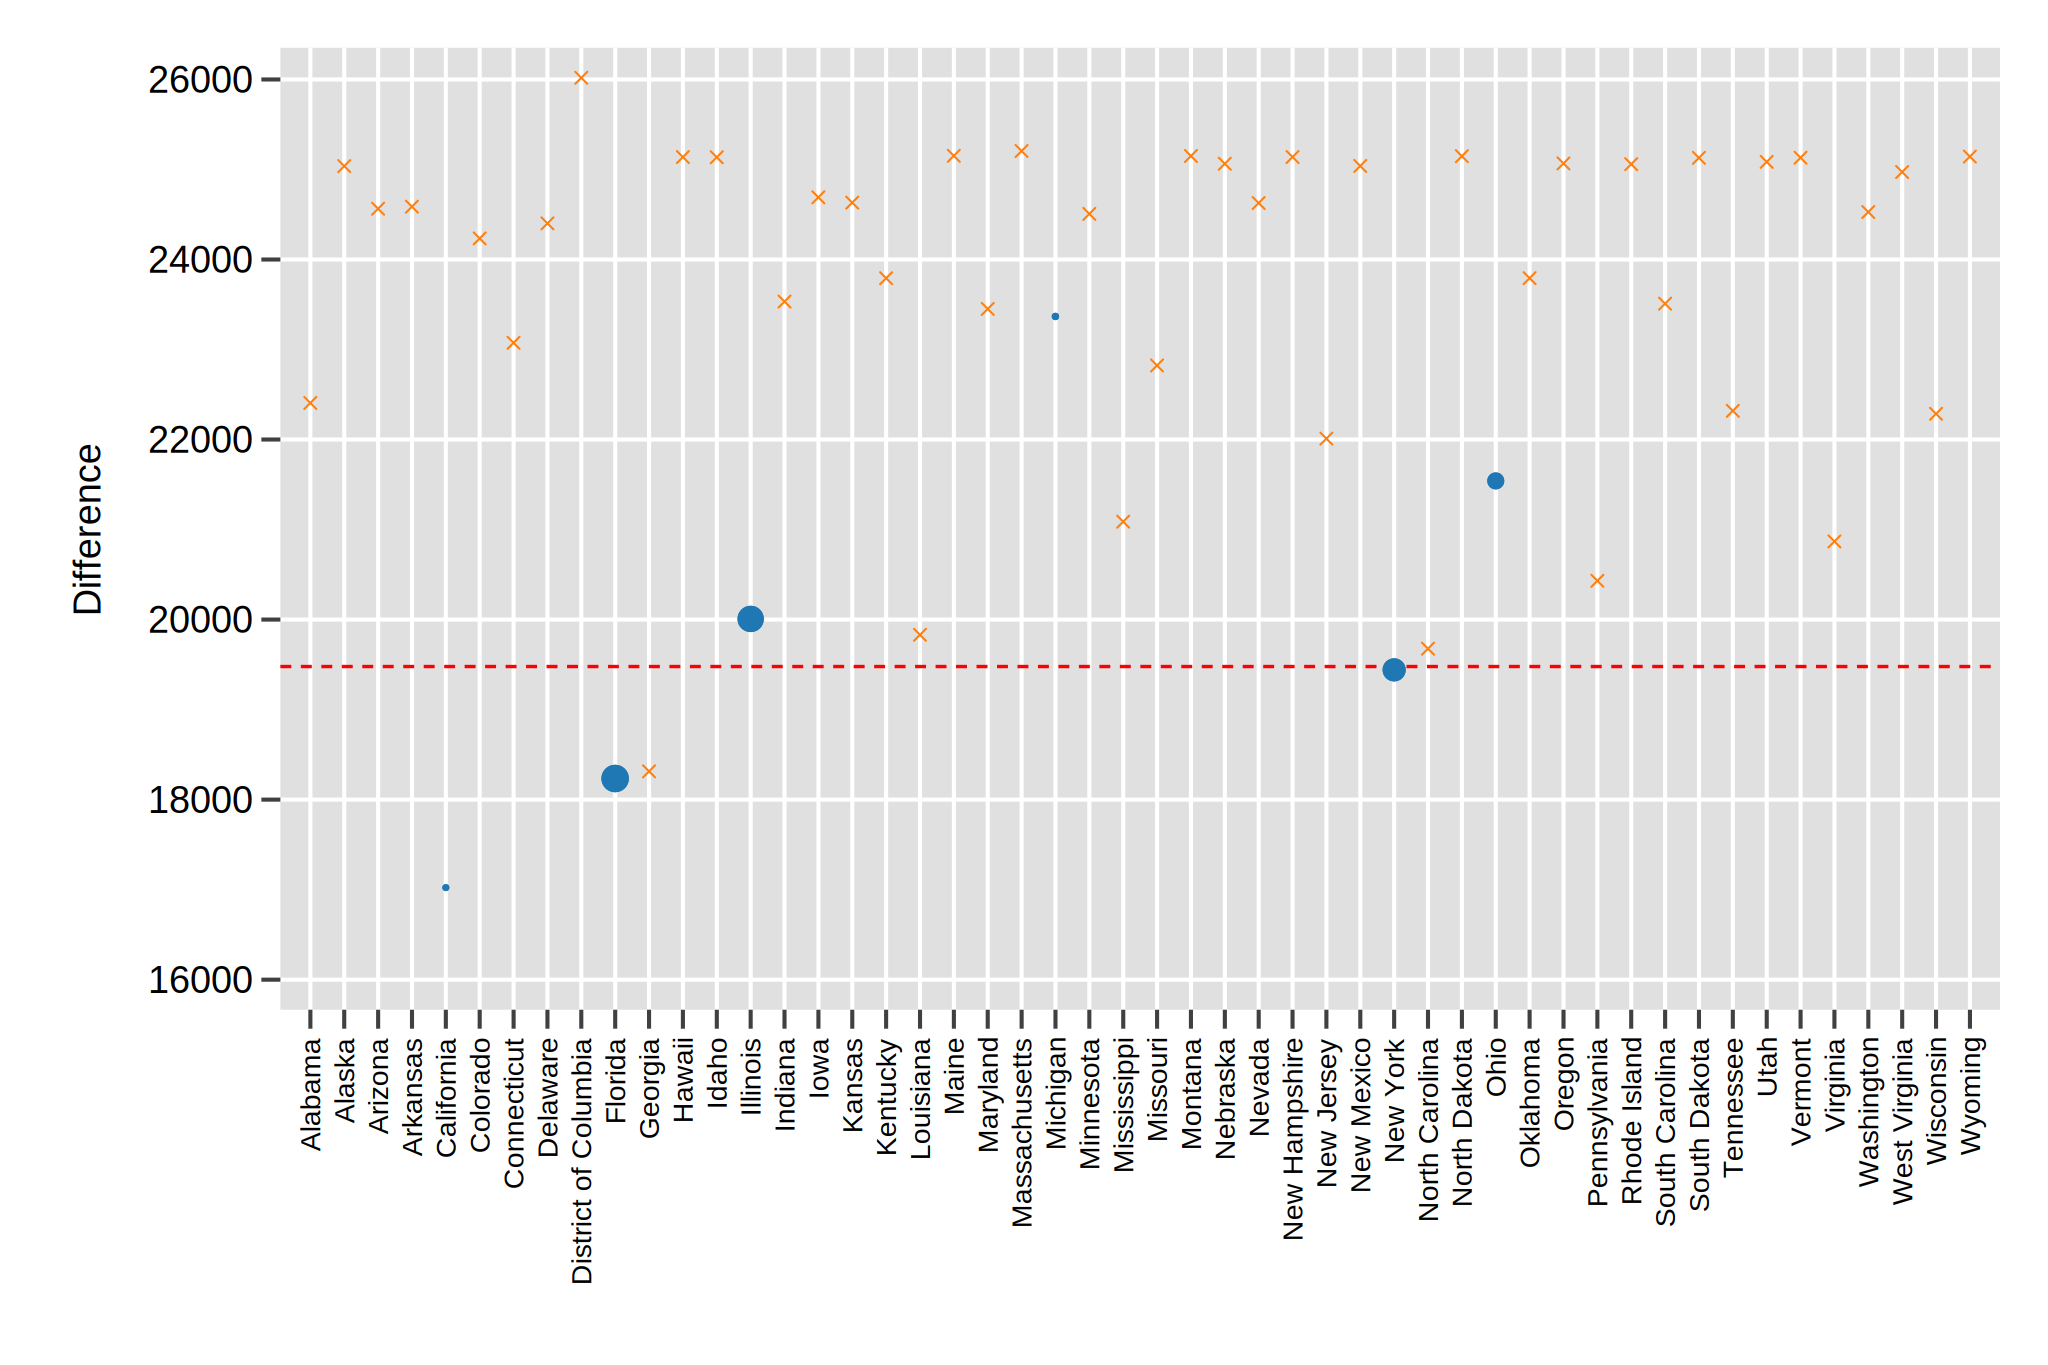

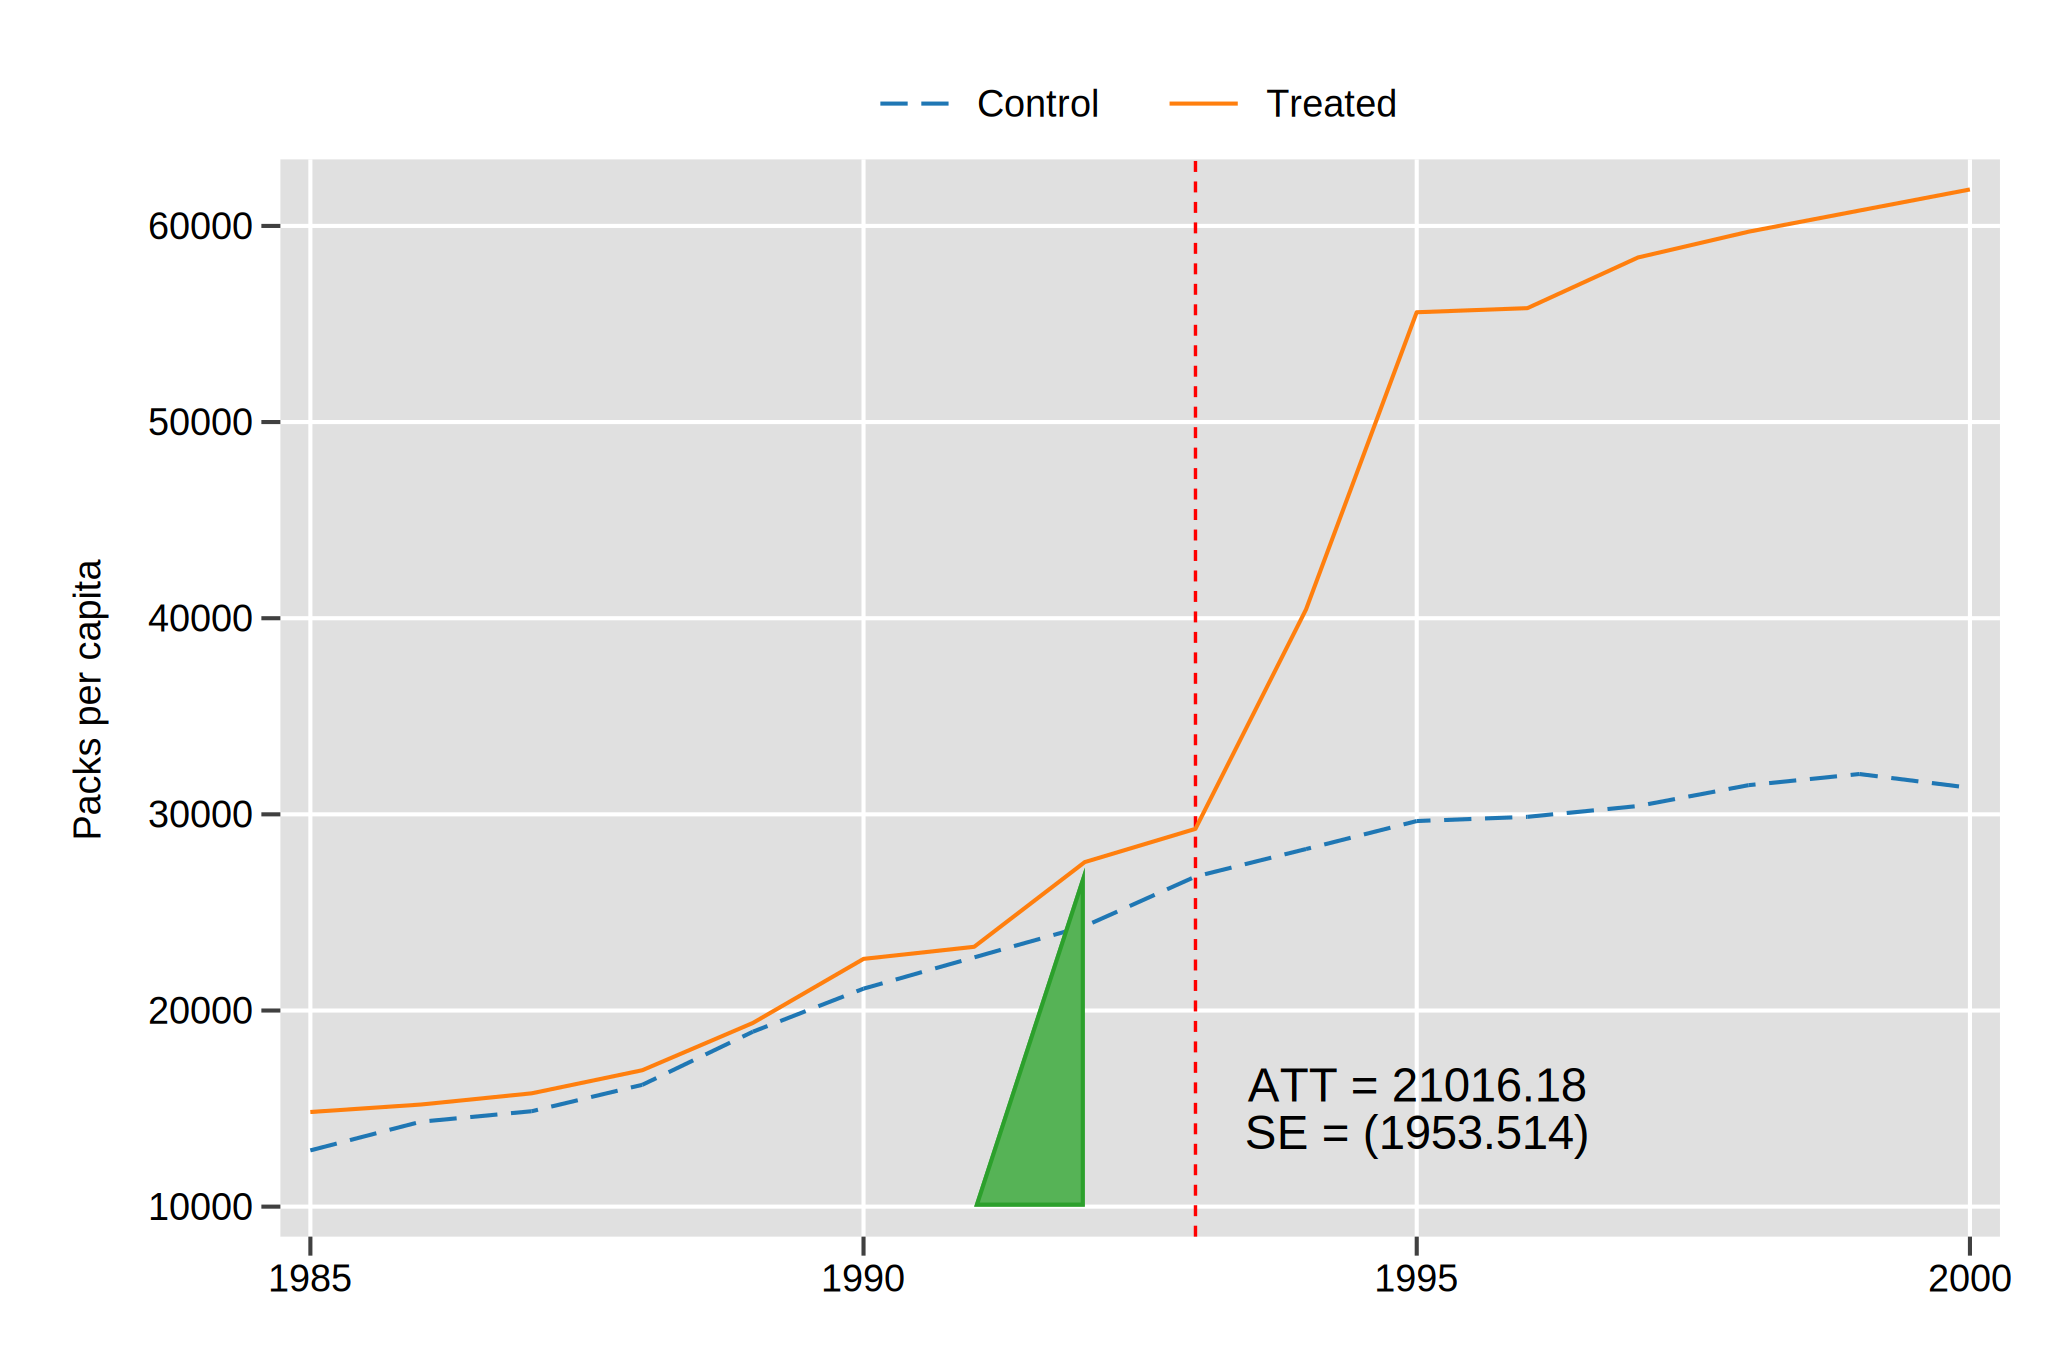

In [14]:
%%stata

// 2. Use sdid instead and compare the ATT, the weights, and the trends plot.

#delimit ;

local scheme = "gg_tableau" ;

sdid bmprison state year treated , vce(placebo) reps(100) seed($seed_num) method(sdid) g1on
     graph g1_opt(xtitle("") scheme(`scheme')) 
     g2_opt( ytitle("Packs per capita") 
            xtitle("") text(15000 1995 "ATT = `e(ATT)'" " SE = (`e(se)')") scheme(`scheme'))
    graph_export(sdid_, .png);
	
#delimit cr
        

In [ ]:
%%stata


// 3. Marvel at how much easier and cleaner this was. 
// (And notice the omission of an ATT in the Recitation 6 file)